In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
import os
import csv
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import linregress
import numpy as np
import dataframe_image as dfi

In [50]:
# reading csv file

movies_df = pd.read_csv("resources/rename_year_df.csv")

In [51]:
#  sorting data datewise

sorted_movie_df = movies_df.sort_values(by=["Date"])
sorted_movie_df.head()

,Unnamed: 0,Movie ID,Title,Date,Genre,RunTime,country,Director,Actors,Average_Vote,Budget,USA Gross Income,Worldwide Gross Income,Fan Reviews,Year
1636,1601,134084,Scream 3,2000-01-09,Horror,116,USA,Wes Craven,Liev Schreiber,5.6,40000000,89143175,161834276,763,2000
1672,151,186566,Space Cowboys,2000-01-09,Action,130,USA,Clint Eastwood,Clint Eastwood,6.4,65000000,90464773,128884132,351,2000
1640,433,229260,Book of Shadows: Blair Witch 2,2000-01-12,Adventure,90,USA,Joe Berlinger,Kurt Loder,3.9,15000000,26437094,47737094,466,2000
1673,38,184858,Reindeer Games,2000-01-12,Action,104,USA,John Frankenheimer,Ben Affleck,5.8,42000000,23368995,32168970,222,2000
1649,396,184907,Snow Day,2000-01-12,Adventure,89,USA,Chris Koch,Chris Elliott,5.1,13000000,60020107,62464731,102,2000


In [52]:
#  adding new column profit percent in dataframe
sorted_movie_df["Profit Percent"] = round(((sorted_movie_df["Worldwide Gross Income"] - sorted_movie_df["Budget"])/sorted_movie_df["Budget"])*100,2)

# # adding new column Profit in Million ($) in dataframe
sorted_movie_df["Profit in Million ($)"] = (sorted_movie_df["Worldwide Gross Income"] - sorted_movie_df["Budget"])/1000000

# # adding new column Box Office Collectio in Million ($) in dataframe
sorted_movie_df["Box Office Collection in Million ($)"] = sorted_movie_df["Worldwide Gross Income"]/1000000

# # adding new column Budget in Million ($) in dataframe
sorted_movie_df["Budget in Million ($)"] = sorted_movie_df["Budget"]/1000000

# # display the dataframe 
sorted_movie_df.head()

,Unnamed: 0,Movie ID,Title,Date,Genre,RunTime,country,Director,Actors,Average_Vote,Budget,USA Gross Income,Worldwide Gross Income,Fan Reviews,Year,Profit Percent,Profit in Million ($),Box Office Collection in Million ($),Budget in Million ($)
1636,1601,134084,Scream 3,2000-01-09,Horror,116,USA,Wes Craven,Liev Schreiber,5.6,40000000,89143175,161834276,763,2000,304.59,121.834276,161.834276,40.0
1672,151,186566,Space Cowboys,2000-01-09,Action,130,USA,Clint Eastwood,Clint Eastwood,6.4,65000000,90464773,128884132,351,2000,98.28,63.884132,128.884132,65.0
1640,433,229260,Book of Shadows: Blair Witch 2,2000-01-12,Adventure,90,USA,Joe Berlinger,Kurt Loder,3.9,15000000,26437094,47737094,466,2000,218.25,32.737094,47.737094,15.0
1673,38,184858,Reindeer Games,2000-01-12,Action,104,USA,John Frankenheimer,Ben Affleck,5.8,42000000,23368995,32168970,222,2000,-23.41,-9.831030,32.168970,42.0
1649,396,184907,Snow Day,2000-01-12,Adventure,89,USA,Chris Koch,Chris Elliott,5.1,13000000,60020107,62464731,102,2000,380.50,49.464731,62.464731,13.0


# Q1) Movies profit earned is related to their runtime?

1. Analyise movies box office collections runtime wise

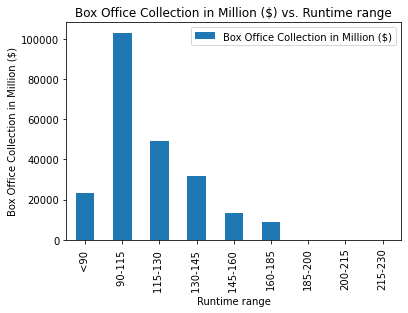

In [54]:
# Create the bins in which Runtime Data will be held
# Bins are 0, 90, 115, 130, 145, 160, 185, 200, 215, 230. 

Bins = [0, 90, 115, 130, 145, 160, 185, 200, 215, 230]

# Create the names for the nine bins

bin_names = [" <90 " , "90-115 ", "115-130 ", "130-145 ", "145-160 ", "160-185", "185-200", "200-215", "215-230"]
sorted_movie_df["Runtime range"] = pd.cut(sorted_movie_df["RunTime"], Bins, labels=bin_names, include_lowest=True)

# # showing bar graph for Runtime Range wise Worldwide Gross Income (Box Office Collection in Million ($))

sorted_movie_df[["Runtime range","Box Office Collection in Million ($)"]].groupby(["Runtime range"]).sum().plot.bar()
plt.xlabel("Runtime range")
plt.ylabel("Box Office Collection in Million ($)")
plt.title("Box Office Collection in Million ($) vs. Runtime range")

plt.show()

2. Classify movies as Flop, Hit, Superhit, Blockbuster etc. based on their profit earned

In [55]:
# Profit percent bins
# Bins are 0, 90, 115, 130, 145, 160, 185, 200, 215, 230. 
Bins = [-100, 0, 100, 200, 400, 2000 ]

# Create the names for the five bins
bin_names = [" Flop " , " Semi Hit ", "Hit ", " Superhit ", "Blockbluster"]
sorted_movie_df["Box Office Report"] = pd.cut(sorted_movie_df["Profit Percent"], Bins, labels=bin_names, include_lowest=True)
sorted_movie_df.head()

,Unnamed: 0,Movie ID,Title,Date,Genre,RunTime,country,Director,Actors,Average_Vote,...,USA Gross Income,Worldwide Gross Income,Fan Reviews,Year,Profit Percent,Profit in Million ($),Box Office Collection in Million ($),Budget in Million ($),Runtime range,Box Office Report
1636,1601,134084,Scream 3,2000-01-09,Horror,116,USA,Wes Craven,Liev Schreiber,5.6,...,89143175,161834276,763,2000,304.59,121.834276,161.834276,40.0,115-130,Superhit
1672,151,186566,Space Cowboys,2000-01-09,Action,130,USA,Clint Eastwood,Clint Eastwood,6.4,...,90464773,128884132,351,2000,98.28,63.884132,128.884132,65.0,115-130,Semi Hit
1640,433,229260,Book of Shadows: Blair Witch 2,2000-01-12,Adventure,90,USA,Joe Berlinger,Kurt Loder,3.9,...,26437094,47737094,466,2000,218.25,32.737094,47.737094,15.0,<90,Superhit
1673,38,184858,Reindeer Games,2000-01-12,Action,104,USA,John Frankenheimer,Ben Affleck,5.8,...,23368995,32168970,222,2000,-23.41,-9.831030,32.168970,42.0,90-115,Flop
1649,396,184907,Snow Day,2000-01-12,Adventure,89,USA,Chris Koch,Chris Elliott,5.1,...,60020107,62464731,102,2000,380.50,49.464731,62.464731,13.0,<90,Superhit


 3. Ploting number of movies runtime range wise

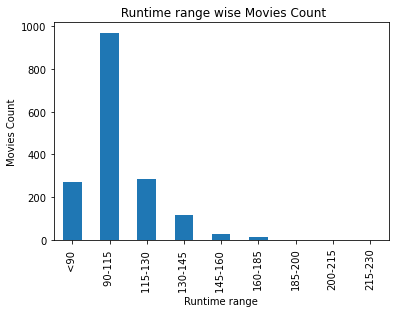

In [56]:
# gropby dataframe on runtime

movie_group_df = sorted_movie_df.groupby("Runtime range")

# # counting the no. of movies
movies_count = movie_group_df["Movie ID"].count()

# # showing bar graph for runtime range wise movies count 
movies_count.plot.bar()
plt.xlabel("Runtime range")
plt.ylabel("Movies Count")
plt.title(" Runtime range wise Movies Count")
plt.show()

 4. Analyise profit% based based on movies runtime

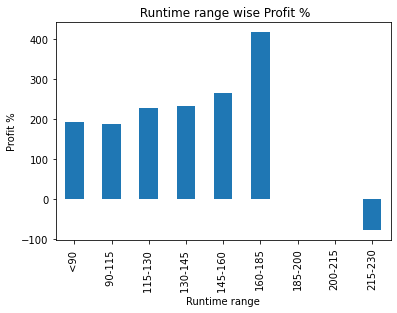

In [57]:
 # showing bar graph for runtime range wise profit %.

runtimegrp_prof_sum = sorted_movie_df[["Runtime range","Profit in Million ($)"]].groupby(["Runtime range"]).sum()
# runtimegrp_prof_sum
runtimegrp_budge_sum = sorted_movie_df[["Runtime range","Budget in Million ($)"]].groupby(["Runtime range"]).sum()
# runtimegrp_budge_sum
runtime_profit_per = (runtimegrp_prof_sum["Profit in Million ($)"]/runtimegrp_budge_sum["Budget in Million ($)"])*100
runtime_profit_per.plot.bar()
plt.xlabel("Runtime range")
plt.ylabel("Profit %")
plt.title(" Runtime range wise Profit %")
plt.show()

5. Finding Correlation between runtime and profitability

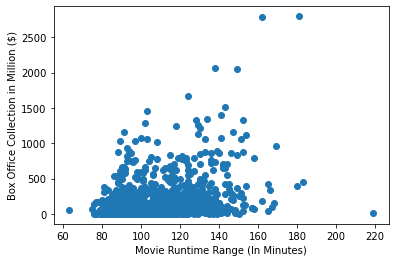

The correlation coefficient between Movie RunTime and Box Office Collection is 0.3
-----------------------------------------------------------------
Conclusion - The runtime and worldwide income has a very low corelation


In [61]:
runtimes = sorted_movie_df["RunTime"]
income = sorted_movie_df["Box Office Collection in Million ($)"]
plt.scatter(runtimes,income)
plt.xlabel("Movie Runtime Range (In Minutes)")
plt.ylabel("Box Office Collection in Million ($)")
plt.show()

# Calculate the correlation coefficient between Movie RunTime and Box Office Collection
print(f"The correlation coefficient between Movie RunTime and Box Office Collection is {round(st.pearsonr(runtimes,income)[0],2)}")
print(f"-----------------------------------------------------------------")
print(f"Conclusion - The runtime and worldwide income has a very low corelation")

  6. Segregating dataframs based on box office results

In [62]:
flops = sorted_movie_df.loc[sorted_movie_df["Box Office Report"] == " Flop "]
semi_hits = sorted_movie_df.loc[sorted_movie_df["Box Office Report"] == " Semi Hit "]
hits = sorted_movie_df.loc[sorted_movie_df["Box Office Report"] == "Hit "]
superhits = sorted_movie_df.loc[sorted_movie_df["Box Office Report"] == " Superhit "]
blockblusters = sorted_movie_df.loc[sorted_movie_df["Box Office Report"] == "Blockbluster"]

In [63]:
# Checking no. for flops, semi-hits, hits, superhits, and blockbusters
len(flops) #434
len(semi_hits) #341
len(hits) # 285
len(superhits) # 314
len(blockblusters) # 279

279

In [64]:
# Biggest Blocbusters(Movie of the year) for 2000-2020

blockbuster_summ = sorted_movie_df[["Date","Year","Title","Director","Genre","Actors","Box Office Collection in Million ($)","Profit Percent"]].loc[sorted_movie_df.groupby("Year")["Box Office Collection in Million ($)"].idxmax()]
# blockbuster_summ.max("Box Office Collectio in Million ($)")
blockbuster_summ.reset_index().head()

,index,Date,Year,Title,Director,Genre,Actors,Box Office Collection in Million ($),Profit Percent
0,1671,2000-06-15,2000,Dinosaur,"Eric Leighton, Ralph Zondag",Animation,Alfre Woodard,349.822765,174.37
1,1624,2001-06-15,2001,Shrek,"Andrew Adamson, Vicky Jenson",Animation,Mike Myers,487.769799,712.95
2,1489,2002-07-06,2002,Spider-Man,Sam Raimi,Action,Tobey Maguire,825.025036,493.54
3,1470,2003-05-23,2003,The Matrix Reloaded,"Lana Wachowski, Lilly Wachowski",Action,Ray Anthony,741.847890,394.57
4,1338,2004-12-17,2004,Shrek 2,"Andrew Adamson, Kelly Asbury",Animation,Mike Myers,928.760770,519.17


7. line graph showing the the trend of biggest blockbuster movies box office collection through out these years(2000-2020)

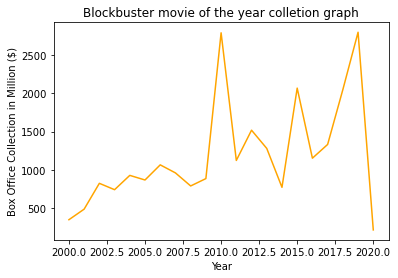

In [65]:
x_axis_data = blockbuster_summ["Year"]
points = blockbuster_summ["Box Office Collection in Million ($)"]
plt.plot(x_axis_data, points,color="orange")
plt.xlabel("Year")
plt.ylabel("Box Office Collection in Million ($)")
plt.title("Blockbuster movie of the year colletion graph")

plt.show()

8. Most sucessful Actors and Directors for 2000-2020.

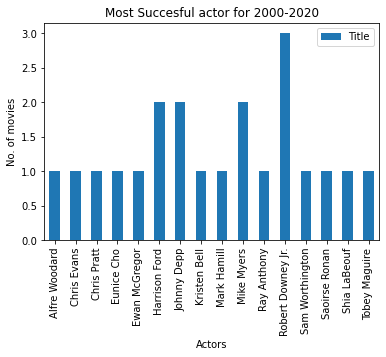

In [66]:
blockbuster_summ[["Title","Actors"]].groupby("Actors").count().plot.bar()
plt.xlabel("Actors")
plt.ylabel("No. of movies")
plt.title("Most Succesful actor for 2000-2020")
plt.show()

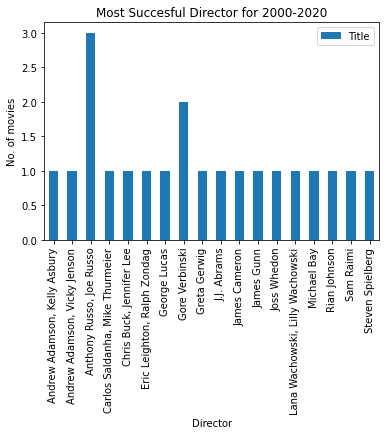

In [67]:
blockbuster_summ[["Title","Director"]].groupby("Director").count().plot.bar()
plt.xlabel("Director")
plt.ylabel("No. of movies")
plt.title("Most Succesful Director for 2000-2020")
plt.show()

# Q2) Are different genres more profitable than other genres

In [75]:
#load fresh csv file
Question_Two = "resources/IMDB_Movies2.csv"
Question_Two_df = pd.read_csv(Question_Two, encoding="utf-8")

In [76]:
unique_list_genre = list(Question_Two_df['genre'].unique())
unique_list_genre

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller']

In [77]:
#reduce the list
Genre_Profit = Question_Two_df[['genre', 'worlwide_gross_income']]
Genre_Profit

,genre,worlwide_gross_income
0,Action,790653942
1,Action,445135288
2,Action,38793283
3,Action,147934180
4,Action,3313583
...,...,...
1676,Mystery,294804195
1677,Romance,127869379
1678,Sci-Fi,161849455
1679,Thriller,96258201


In [78]:
# sum the profits made by category
Genre_Profit_grouped = Genre_Profit.groupby(["genre"]).sum()
Genre_Profit_grouped

,worlwide_gross_income
genre,
Action,91270779105
Adventure,8321348021
Animation,49457243863
Biography,6945240793
Comedy,41138561095
Crime,6214568943
Drama,17035824327
Family,1278931894
Fantasy,257805064


Text(0, 0.5, 'Total Income In American Dollars By Genre with 1 = $10,000,000,000')

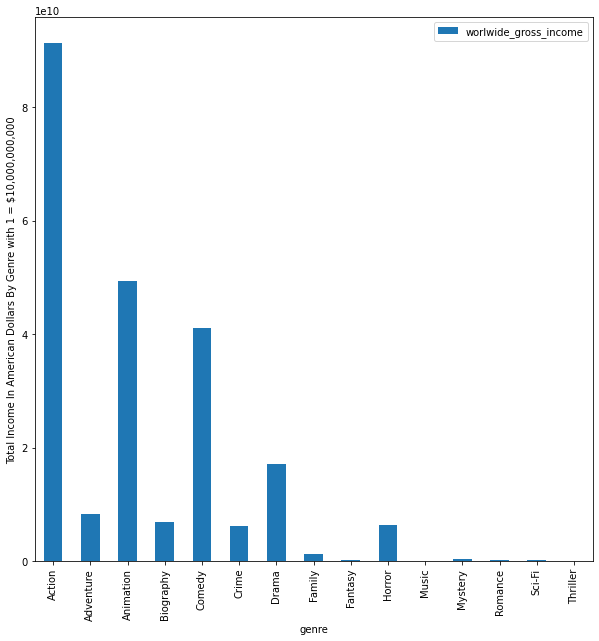

In [79]:
#show income total by genre 
axis = Genre_Profit_grouped.plot.bar(rot=90, figsize=(10, 10))
plt.ylabel("Total Income In American Dollars By Genre with 1 = $10,000,000,000")

In [80]:
# count movies by there genre
Genre_Profit_g_count = Genre_Profit.groupby(["genre"]).count()
Genre_Profit_g_count = Genre_Profit_g_count.rename(columns={'worlwide_gross_income':'Movie Total'})
Genre_Profit_g_count

,Movie Total
genre,
Action,372
Adventure,64
Animation,126
Biography,91
Comedy,566
Crime,105
Drama,259
Family,2
Fantasy,3


In [81]:
#merge genre income total and total genre count dataframes
two_merge_df = pd.merge(Genre_Profit_g_count, Genre_Profit_grouped, on="genre")
two_merge_df

,Movie Total,worlwide_gross_income
genre,,
Action,372,91270779105
Adventure,64,8321348021
Animation,126,49457243863
Biography,91,6945240793
Comedy,566,41138561095
Crime,105,6214568943
Drama,259,17035824327
Family,2,1278931894
Fantasy,3,257805064


In [82]:
#calculate average income for the genre
two_merge_df['Average Income'] = two_merge_df['worlwide_gross_income']/two_merge_df['Movie Total']
two_merge_df

,Movie Total,worlwide_gross_income,Average Income
genre,,,
Action,372,91270779105,2.453516e+08
Adventure,64,8321348021,1.300211e+08
Animation,126,49457243863,3.925178e+08
Biography,91,6945240793,7.632133e+07
Comedy,566,41138561095,7.268297e+07
Crime,105,6214568943,5.918637e+07
Drama,259,17035824327,6.577538e+07
Family,2,1278931894,6.394659e+08
Fantasy,3,257805064,8.593502e+07


In [83]:
#remove scientific notation 
two_merge_df['Average Income'] = two_merge_df['Average Income'].astype('int64') 
two_merge_df

,Movie Total,worlwide_gross_income,Average Income
genre,,,
Action,372,91270779105,245351556
Adventure,64,8321348021,130021062
Animation,126,49457243863,392517808
Biography,91,6945240793,76321327
Comedy,566,41138561095,72682970
Crime,105,6214568943,59186370
Drama,259,17035824327,65775383
Family,2,1278931894,639465947
Fantasy,3,257805064,85935021


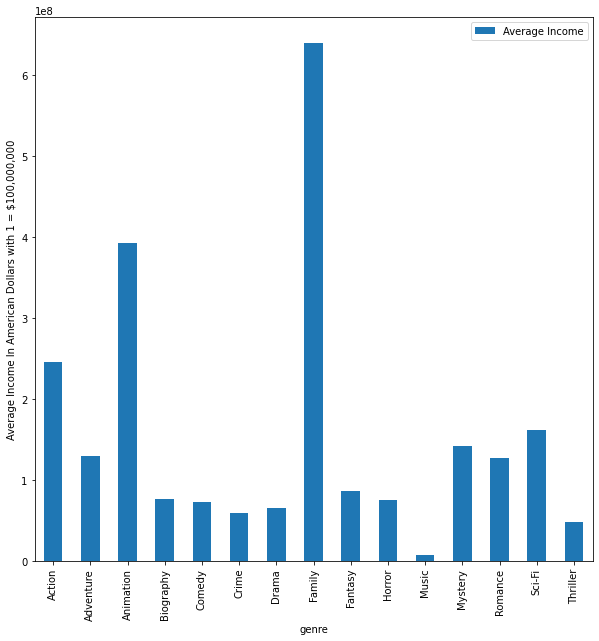

In [84]:
#display average gross income by genre
Gen_Avg_Inc = two_merge_df[['Average Income']]
bar_avg_gen_prof = Gen_Avg_Inc.plot.bar(rot=90, figsize=(10, 10))
plt.ylabel("Average Income In American Dollars with 1 = $100,000,000")
bar_avg_gen_prof

In [85]:
#Remove genres with low movie count
Significant_genres = two_merge_df.loc[two_merge_df['Movie Total'] > 50]
Significant_genres

,Movie Total,worlwide_gross_income,Average Income
genre,,,
Action,372,91270779105,245351556
Adventure,64,8321348021,130021062
Animation,126,49457243863,392517808
Biography,91,6945240793,76321327
Comedy,566,41138561095,72682970
Crime,105,6214568943,59186370
Drama,259,17035824327,65775383
Horror,85,6440822447,75774381


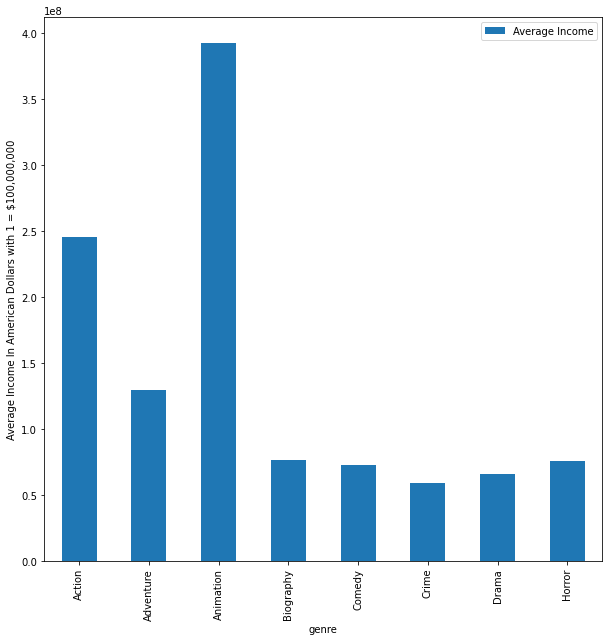

In [86]:
#show reduced bar plot of movie genres which have a significant number of data points  
Gen_Avg_Inc2 = Significant_genres[['Average Income']]
bar_avg_gen_prof = Gen_Avg_Inc2.plot.bar(rot=90, figsize=(10, 10))
plt.ylabel("Average Income In American Dollars with 1 = $100,000,000")
bar_avg_gen_prof

In [88]:
#load csv file with the years in it
Year_df = "resources/rename_year_df.csv"
Year_df = pd.read_csv(Year_df, encoding="utf-8")

In [90]:
#last five years sumary
Year_15_20_df = Year_df.loc[Year_df['Year'] >= 2015]
#films made in last five years count
Year_15_20_df_count = Year_15_20_df.groupby(["Genre"]).count()
Year_15_20_df_count = Year_15_20_df_count.rename(columns={'Worldwide Gross Income':'Movie Total'})
Year_15_20_df_counted = Year_15_20_df_count[['Movie Total']]
Year_15_20_df_counted

,Movie Total
Genre,
Action,94
Adventure,8
Animation,28
Biography,38
Comedy,88
Crime,15
Drama,49
Family,1
Horror,26


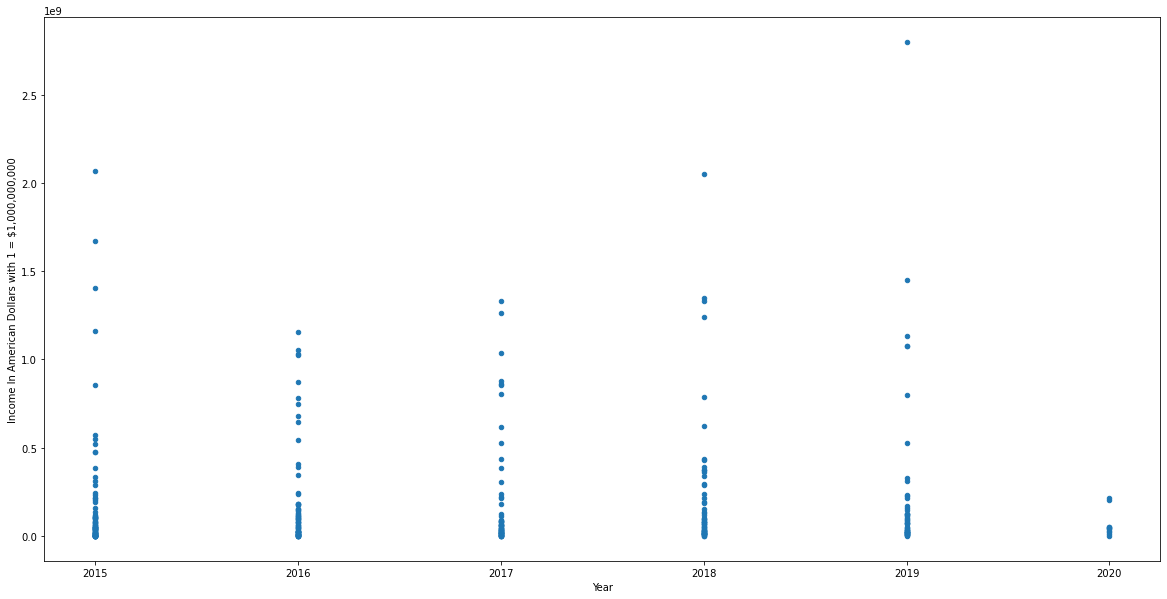

In [91]:
#show scatter of films by year and there income
Year_15_20_df.plot(x='Year', y='Worldwide Gross Income', kind='scatter', figsize=(20, 10))
plt.ylabel("Income In American Dollars with 1 = $1,000,000,000")
plt.show()

In [93]:
#get frame to analyze the animation genre which is has highest aveage of signifacant movies
Year_15_20_df_an = Year_15_20_df[Year_15_20_df["Genre"].str.contains("Animation")==True]

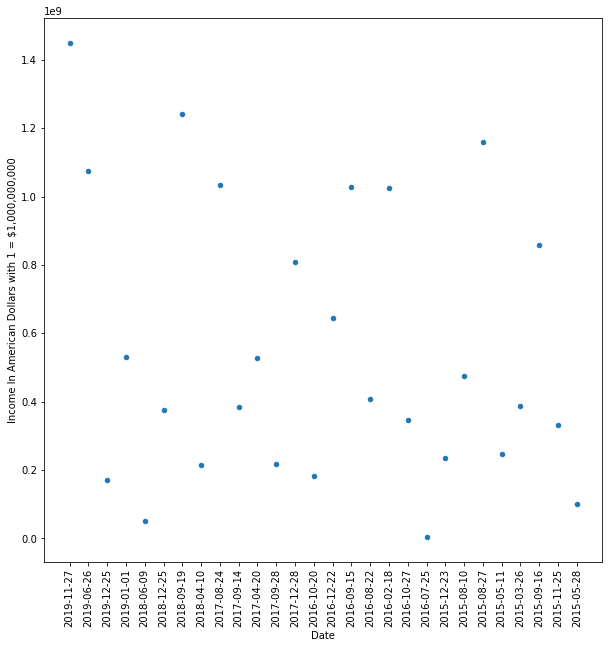

In [94]:
# show the sucusses of animation over last five years
Year_15_20_df_an.plot(x='Date', y='Worldwide Gross Income', kind='scatter', rot=90, figsize=(10, 10))
plt.ylabel("Income In American Dollars with 1 = $1,000,000,000")
plt.show()
#the graph shows a flat spread meaning there where no years when animation had an uptik of interest 
#shis is good as it means income is steady from this genre no matter the year

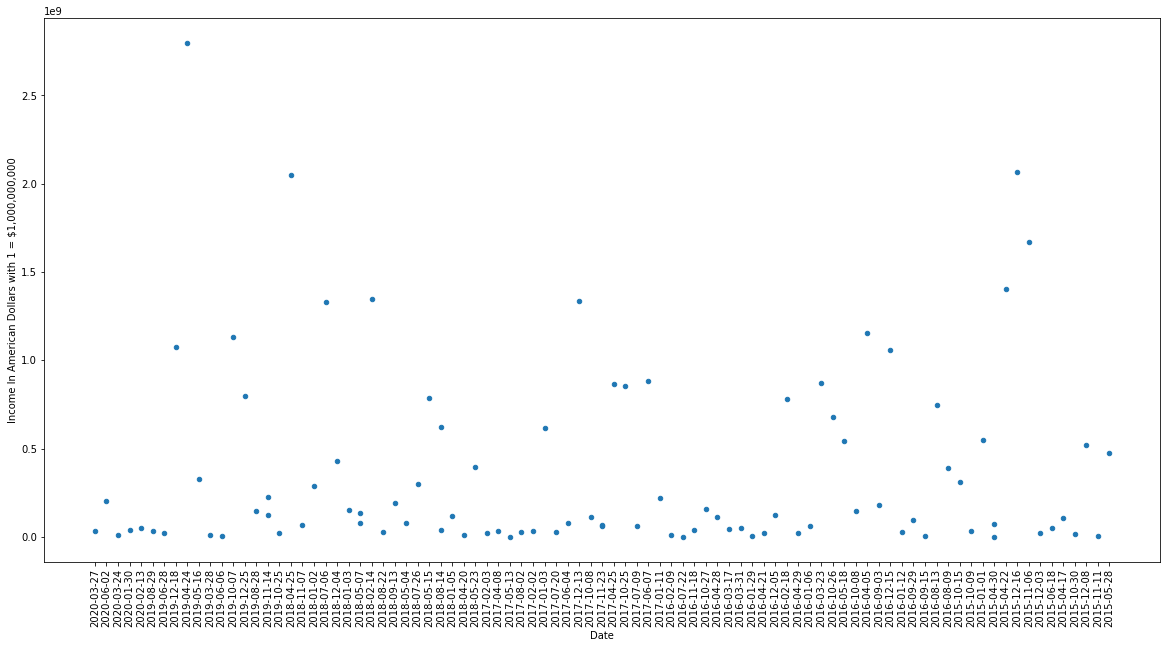

In [95]:
#This graph shows income from action movies over the last five years
Year_15_20_df_ac = Year_15_20_df[Year_15_20_df["Genre"].str.contains("Action")==True]
Year_15_20_df_ac.plot(x='Date', y='Worldwide Gross Income', kind='scatter', rot=90, figsize=(20, 10))
plt.ylabel("Income In American Dollars with 1 = $1,000,000,000")
plt.show() 
#the income from action movies is also steady

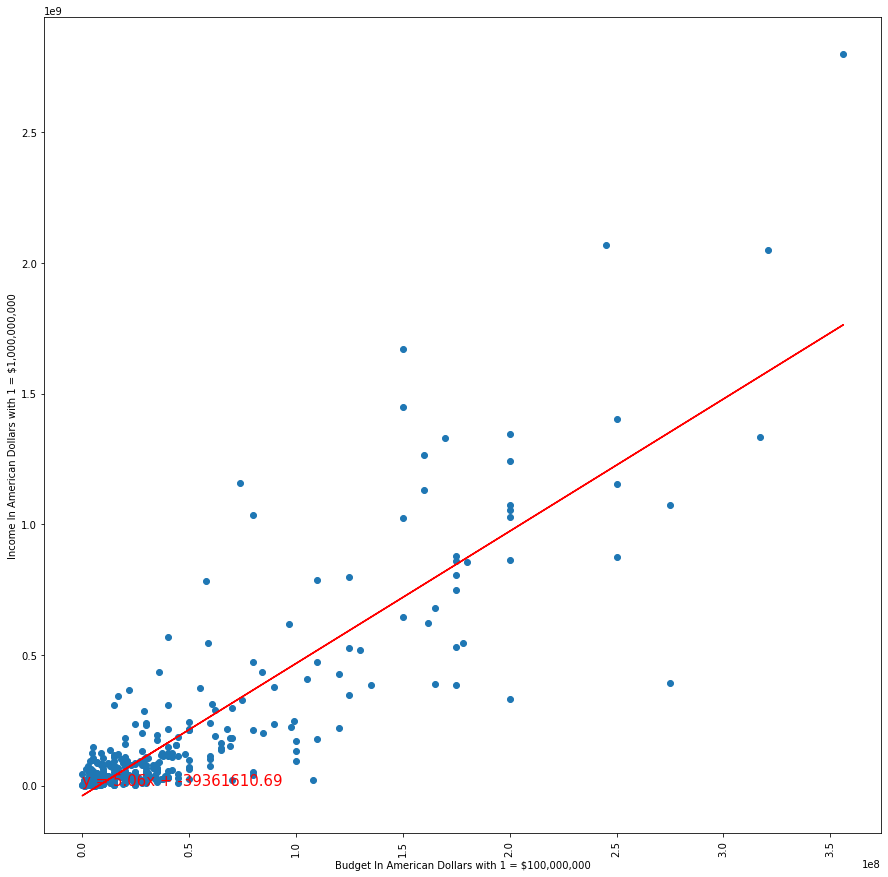

In [96]:
#shows if there is a direct relationship between budget and income made however it also shows there are some outliers
#where movies make more than what they would be predicted or less than predicted 
#the relationship does become less reliable as the bugdet increases showing there is more risk in expensive movies
Year_15_20_df.plot(x='Budget', y='Worldwide Gross Income', kind='scatter', rot=90, figsize=(15, 15))

#plot the line regress for our graph
x_values = Year_15_20_df['Budget']
y_values = Year_15_20_df['Worldwide Gross Income']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")


plt.ylabel("Income In American Dollars with 1 = $1,000,000,000")
plt.xlabel("Budget In American Dollars with 1 = $100,000,000")

plt.show() 

In [100]:
#import original data with all genres and there sub genres
Original = "Resources/IMDB_Mov.csv"
Original_df = pd.read_csv(Original, encoding="utf-8")
Original_df = Original_df.rename(columns={'original_title':'Title'})
Original_df_reduced = Original_df[['genre', 'Title']]
Original_df_reduced

,genre,Title
0,"Comedy, Fantasy, Romance",Kate & Leopold
1,"Drama, Music, Romance",Glitter
2,"Drama, Romance",Fa yeung nin wah
3,"Comedy, Drama",State and Main
4,"Comedy, Drama",Sånger från andra våningen
...,...,...
5482,"Adventure, Drama, War",Da 5 Bloods
5483,"Comedy, Romance",The Kissing Booth 2
5484,"Animation, Drama, Fantasy",J'ai perdu mon corps
5485,"Comedy, Romance",Falling Inn Love


In [102]:
#Interested in data from the last five years so merge with 5 year data so we now have sub genre info in our main dataframe
Merge_Genres = pd.merge(Original_df_reduced, Year_15_20_df, on="Title", how='right')

In [103]:
#find the sub genres by spliting them off from genre data imported from original and drop the extra main genre that is created
sub = Merge_Genres['genre'].str.split(',', expand=True)
sub = sub.rename(columns={1:' Sub Genre'})
sub = sub.rename(columns={2:' Secondary Sub Genre'})
sub.drop(0, axis=1, inplace=True)
sub

,Sub Genre,Secondary Sub Genre
0,Crime,Thriller
1,Comedy,Crime
2,Crime,Drama
3,Crime,Drama
4,Adventure,Sci-Fi
...,...,...
348,None,None
349,Horror,Thriller
350,Mystery,Thriller
351,Crime,Drama


In [104]:
#merge information gathered on sub genres back into our data frame 
Merge_Genres2 = pd.merge(sub, Merge_Genres, left_index=True, right_index=True)
Merge_Genres2.drop('genre', axis=1, inplace=True)
Merge_Genres2

,Sub Genre,Secondary Sub Genre,Title,Unnamed: 0,Movie ID,Date,Genre,RunTime,country,Director,Actors,Average_Vote,Budget,USA Gross Income,Worldwide Gross Income,Fan Reviews,Year
0,Crime,Thriller,Shaft,204,4463894,2019-06-28,Action,111,USA,Tim Story,Samuel L. Jackson,6.4,35000000,21360215,21360215,360,2019
1,Comedy,Crime,Shaft,204,4463894,2019-06-28,Action,111,USA,Tim Story,Samuel L. Jackson,6.4,35000000,21360215,21360215,360,2019
2,Crime,Drama,Heist,260,3276924,2015-11-11,Action,93,USA,Scott Mann,Robert De Niro,6.1,8900000,50136,3777046,105,2015
3,Crime,Drama,Heist,260,3276924,2015-11-11,Action,93,USA,Scott Mann,Robert De Niro,6.1,8900000,50136,3777046,105,2015
4,Adventure,Sci-Fi,Jurassic World,107,369610,2015-11-06,Action,124,USA,Colin Trevorrow,Chris Pratt,7.0,150000000,652270625,1670401444,1537,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,None,None,3 from Hell,1598,8134742,2020-04-26,Horror,115,USA,Rob Zombie,Sheri Moon Zombie,5.5,3000000,2172949,2295825,311,2020
349,Horror,Thriller,The Hunt,339,8244784,2020-03-24,Action,90,USA,Craig Zobel,Betty Gilpin,6.5,14000000,5812500,10530977,757,2020
350,Mystery,Thriller,Annabelle Comes Home,1644,8350360,2019-03-07,Horror,106,USA,Gary Dauberman,Vera Farmiga,5.9,30000000,74152591,231252591,748,2019
351,Crime,Drama,Knives Out,786,8946378,2019-05-12,Comedy,130,USA,Rian Johnson,Daniel Craig,7.9,40000000,165363234,309232797,2334,2019


In [106]:
#get all animation films made in 2015-2020
animation15_20 = Merge_Genres2[Merge_Genres2["Genre"].str.contains("Animation")==True]

In [107]:
#calculate average income of sub genres of animation 2015-2020
animation15_20_sub1 = animation15_20.groupby([' Sub Genre', ' Secondary Sub Genre'])['Worldwide Gross Income'].mean()
animation15_20_sub1

 Sub Genre   Secondary Sub Genre
 Action      Adventure              460513297.5
             Crime                    4462034.0
 Adventure   Comedy                 606807200.2
             Family                 807083670.0
 Comedy      Family                 360516556.5
Name: Worldwide Gross Income, dtype: float64

In [108]:
#used to find there was a space at beginning of sub genres
print(Merge_Genres2.columns.tolist())

[' Sub Genre', ' Secondary Sub Genre', 'Title', 'Unnamed: 0', 'Movie ID', 'Date', 'Genre', 'RunTime', 'country', 'Director', 'Actors', 'Average_Vote', 'Budget', 'USA Gross Income', 'Worldwide Gross Income', 'Fan Reviews', 'Year']


Text(0, 0.5, 'Average Income In American Dollars with 1 = $100,000,000')

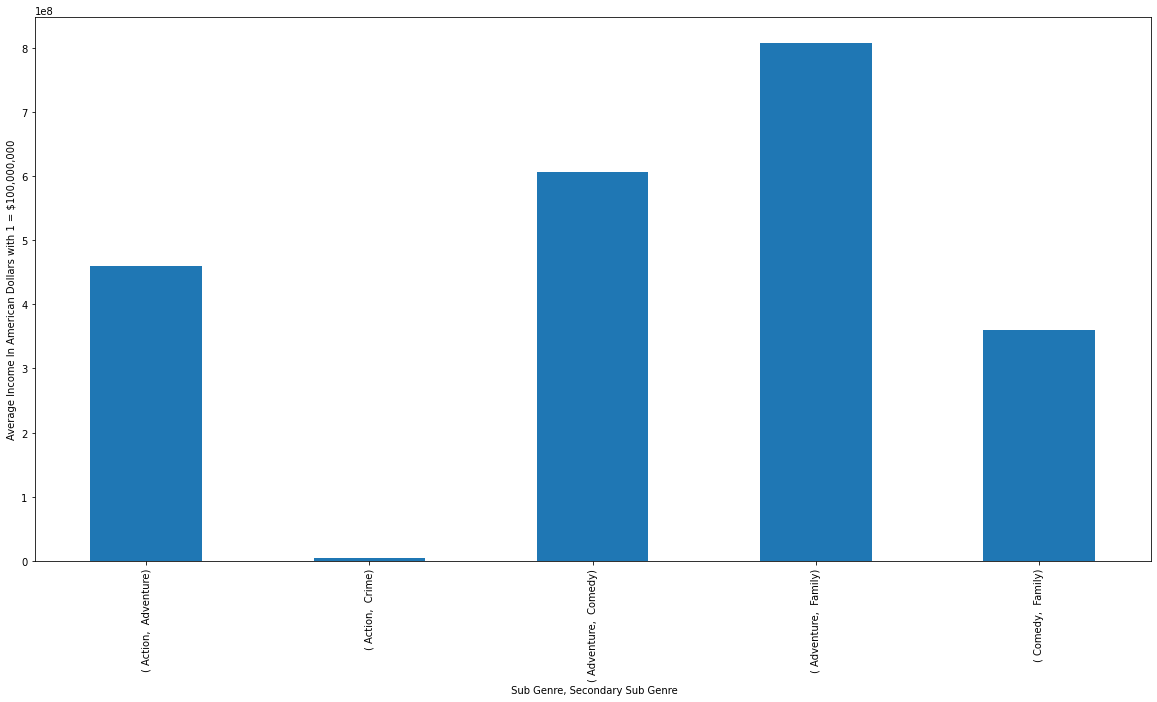

In [109]:
#basic bar graph for sub genre vs average
animation15_20_sub1.plot(x=' Sub Genre', y='Worldwide Gross Income', kind='bar', rot=90, figsize=(20, 10))
plt.ylabel("Average Income In American Dollars with 1 = $100,000,000")

In [110]:
#get more in depth and find sub genre and sub genre average income
animation15_20_sub2 = animation15_20.groupby([' Sub Genre', ' Secondary Sub Genre'])['Worldwide Gross Income'].mean()
animation15_20_sub2

 Sub Genre   Secondary Sub Genre
 Action      Adventure              460513297.5
             Crime                    4462034.0
 Adventure   Comedy                 606807200.2
             Family                 807083670.0
 Comedy      Family                 360516556.5
Name: Worldwide Gross Income, dtype: float64

Text(0, 0.5, 'Average Income In American Dollars with 1 = $100,000,000')

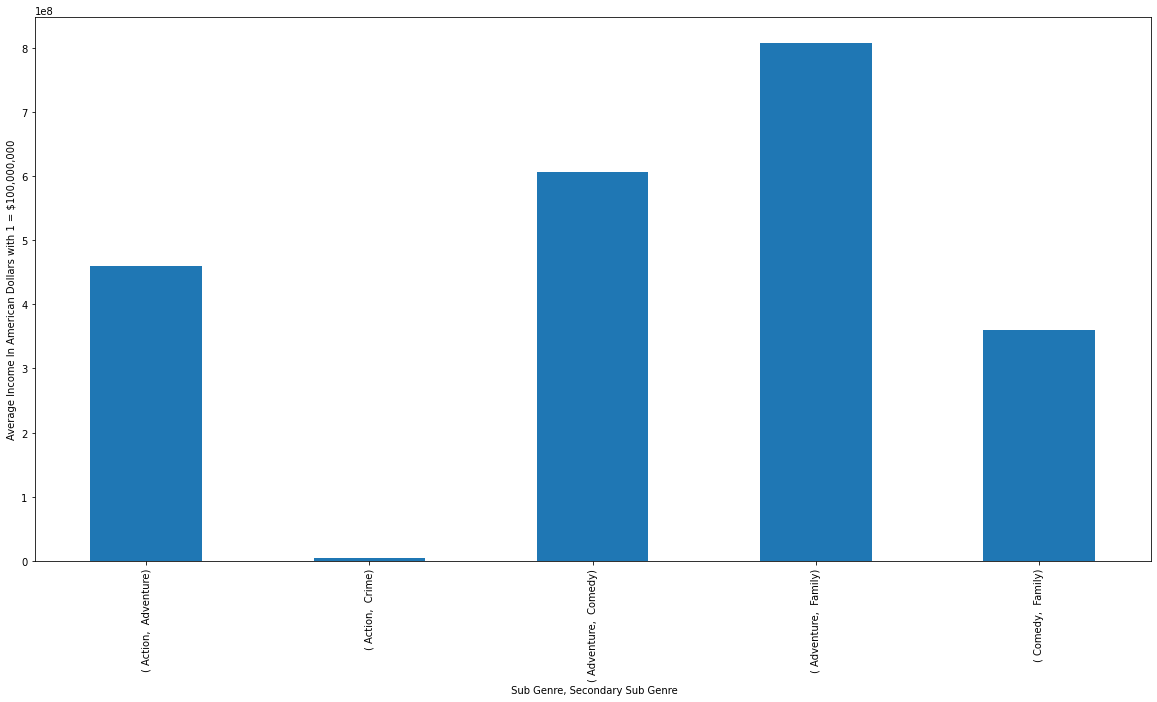

In [111]:
#plot for animation what sub genre and secondary sub genre has highest average 
an = animation15_20_sub2.plot(x=' Sub Genre', y='Worldwide Gross Income', kind='bar', rot=90, figsize=(20, 10))
plt.ylabel("Average Income In American Dollars with 1 = $100,000,000")

In [113]:
#find 2015-2020 action movies
action15_20 = Merge_Genres2[Merge_Genres2["Genre"].str.contains("Action")==True]

In [114]:
#now find out average gross income by sub genre and sceondary sub genre for action movies
action15_20_sub = action15_20.groupby([' Sub Genre', ' Secondary Sub Genre'])['Worldwide Gross Income'].mean()
action15_20_sub

 Sub Genre   Secondary Sub Genre
 Adventure   Comedy                 5.552055e+08
             Crime                  2.018585e+08
             Drama                  5.797727e+08
             Fantasy                5.818414e+08
             Mystery                1.792469e+08
             Sci-Fi                 1.018776e+09
 Biography   Drama                  2.060805e+08
 Comedy      Crime                  8.629655e+07
             Drama                  4.366460e+06
             Horror                 1.613705e+07
             Romance                6.075950e+05
 Crime       Drama                  4.072690e+07
             Thriller               1.488922e+08
 Drama       History                5.532749e+07
             Horror                 1.102170e+08
             Sci-Fi                 3.249384e+08
             Thriller               1.515726e+08
             Western                3.067531e+06
 Horror      Sci-Fi                 6.224953e+07
             Thriller               

Text(0, 0.5, 'Average Income In American Dollars with 1 = $1,000,000,000')

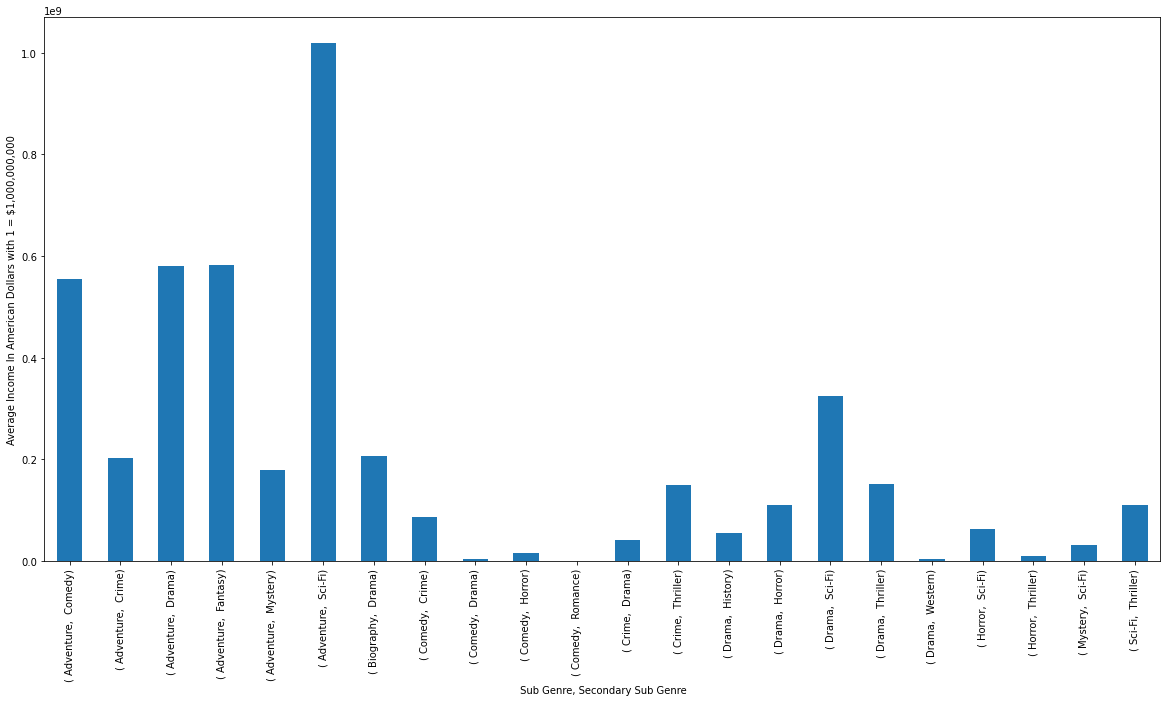

In [115]:
#plot for animation what sub genre and secondary sub genre has highest average 
ac = action15_20_sub.plot(x=' Sub Genre', y='Worldwide Gross Income', kind='bar', rot=90, figsize=(20, 10))
plt.ylabel("Average Income In American Dollars with 1 = $1,000,000,000")

In [116]:
#find average income of all genres split by there sub genres
all_15_20_sub = Merge_Genres2.groupby(['Genre', ' Sub Genre', ' Secondary Sub Genre'])['Worldwide Gross Income'].mean()
all_15_20_sub

Genre    Sub Genre   Secondary Sub Genre
Action   Adventure   Comedy                 5.552055e+08
                     Crime                  2.018585e+08
                     Drama                  5.797727e+08
                     Fantasy                5.818414e+08
                     Mystery                1.792469e+08
                                                ...     
Drama    Romance     Thriller               4.708182e+08
Family   Fantasy     Musical                1.264064e+09
Horror   Music       Thriller               3.769214e+06
         Mystery     Sci-Fi                 2.710962e+07
                     Thriller               1.324141e+08
Name: Worldwide Gross Income, Length: 76, dtype: float64

Text(0, 0.5, 'Average Income In American Dollars with 1 = $1,000,000,000')

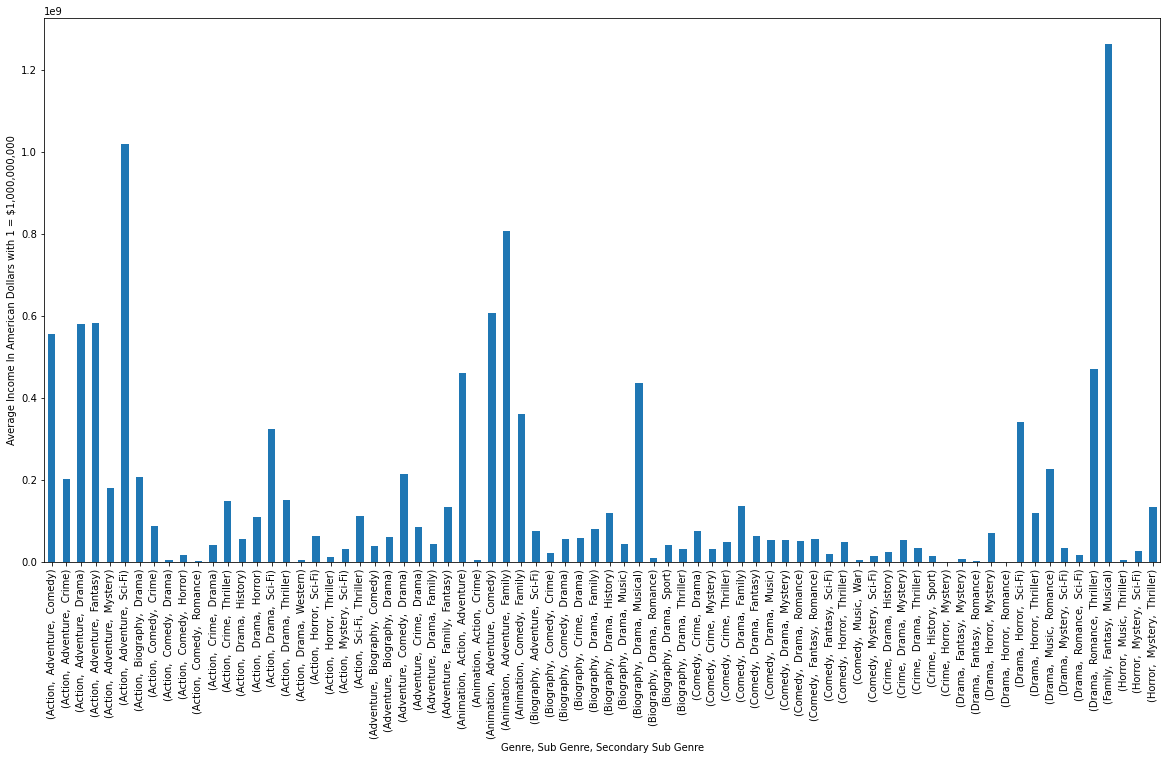

In [117]:
#plot out all the average gross income by sub genre data
plot_all_sub = all_15_20_sub.plot(x='Genre', y='Worldwide Gross Income', kind='bar', rot=90, figsize=(20, 10))
plt.ylabel("Average Income In American Dollars with 1 = $1,000,000,000")

# Q3) Does the runtime of the movie affect the public rating?

In [3]:
## Import the IMDB_Movies2.csv file as a DataFrame
movies_df = pd.read_csv("resources/IMDB_Movies2.csv")


## csv file  manipulation 
* dropping rows with empty cells
* Renaming the columns 
* Converting the Date into a datetime format for the data manipolation
* adding a new column "Year" 
* sorting the data by year in a discending order


In [4]:
#dropping row with empty value
movies_df.dropna(how ="any")

,Movie ID,original_title,date_published,genre,duration,country,director,actors_1,avg_vote,budget,usa_gross_income,worlwide_gross_income,reviews_from_users
0,367882,Indiana Jones and the Kingdom of the Crystal S...,23/05/2008,Action,122,USA,Steven Spielberg,Harrison Ford,6.1,185000000,317101119,790653942,2173
1,120912,Men in Black II,13/09/2002,Action,88,USA,Barry Sonnenfeld,Tommy Lee Jones,6.2,140000000,193735288,445135288,650
2,157472,Clockstoppers,26/07/2002,Action,94,USA,Jonathan Frakes,Jesse Bradford,5.2,26000000,36989956,38793283,95
3,227538,Spy Kids,24/08/2001,Action,88,USA,Robert Rodriguez,Antonio Banderas,5.5,35000000,112719001,147934180,221
4,258038,Pootie Tang,29/06/2001,Action,81,USA,Louis C.K.,Lance Crouther,5.3,7000000,3313583,3313583,133
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1130884,Shutter Island,05/03/2010,Mystery,138,USA,Martin Scorsese,Leonardo DiCaprio,8.2,80000000,128012934,294804195,1286
1677,1385826,The Adjustment Bureau,17/06/2011,Romance,106,USA,George Nolfi,Matt Damon,7.0,50200000,62495645,127869379,477
1678,1219289,Limitless,15/04/2011,Sci-Fi,105,USA,Neil Burger,Bradley Cooper,7.4,27000000,79249455,161849455,488
1679,421239,Red Eye,21/10/2005,Thriller,85,USA,Wes Craven,Rachel McAdams,6.4,26000000,57891803,96258201,706


In [5]:
#rename columns for better understanding
rename_df = movies_df.rename( columns={"original_title" : "Title", "actors_1":"Actors",
                                       "date_published":"Date","budget":"Budget","director":"Director", 
                                       "usa_gross_income":"USA Gross Income",
                                       "worlwide_gross_income":"Worldwide Gross Income",
                                       "genre":"Genre","duration":"RunTime","avg_vote":"Average_Vote", 
                                       "reviews_from_users":"Fan Reviews" })


In [6]:
#convert date to datetime format
rename_df["Date"] = pd.to_datetime(rename_df.Date)

In [7]:
#adding a new column "year"
rename_df["Year"] = rename_df.Date.dt.year
rename_df.head()

,Movie ID,Title,Date,Genre,RunTime,country,Director,Actors,Average_Vote,Budget,USA Gross Income,Worldwide Gross Income,Fan Reviews,Year
0,367882,Indiana Jones and the Kingdom of the Crystal S...,2008-05-23,Action,122,USA,Steven Spielberg,Harrison Ford,6.1,185000000,317101119,790653942,2173,2008
1,120912,Men in Black II,2002-09-13,Action,88,USA,Barry Sonnenfeld,Tommy Lee Jones,6.2,140000000,193735288,445135288,650,2002
2,157472,Clockstoppers,2002-07-26,Action,94,USA,Jonathan Frakes,Jesse Bradford,5.2,26000000,36989956,38793283,95,2002
3,227538,Spy Kids,2001-08-24,Action,88,USA,Robert Rodriguez,Antonio Banderas,5.5,35000000,112719001,147934180,221,2001
4,258038,Pootie Tang,2001-06-29,Action,81,USA,Louis C.K.,Lance Crouther,5.3,7000000,3313583,3313583,133,2001


In [8]:
#sorting the dataframe by descending order
rename_year_df = rename_df.sort_values(["Year"], ascending=False)

In [9]:
#exporting the csv file
rename_year_df.to_csv("resources/rename_year_df.csv")

In [12]:
#creating four dataframes considering different yearly intervals  
Bin_df = rename_year_df.loc[rename_year_df["Year"] < 2005]
Bin1_df = rename_year_df.loc[(rename_year_df["Year"] >= 2005) & (rename_year_df["Year"]< 2010)]
Bin2_df = rename_year_df.loc[(rename_year_df["Year"] >= 2010) & (rename_year_df["Year"]< 2015)]
Bin3_df = rename_year_df.loc[rename_year_df["Year"] >= 2015]

<Figure size 432x288 with 0 Axes>

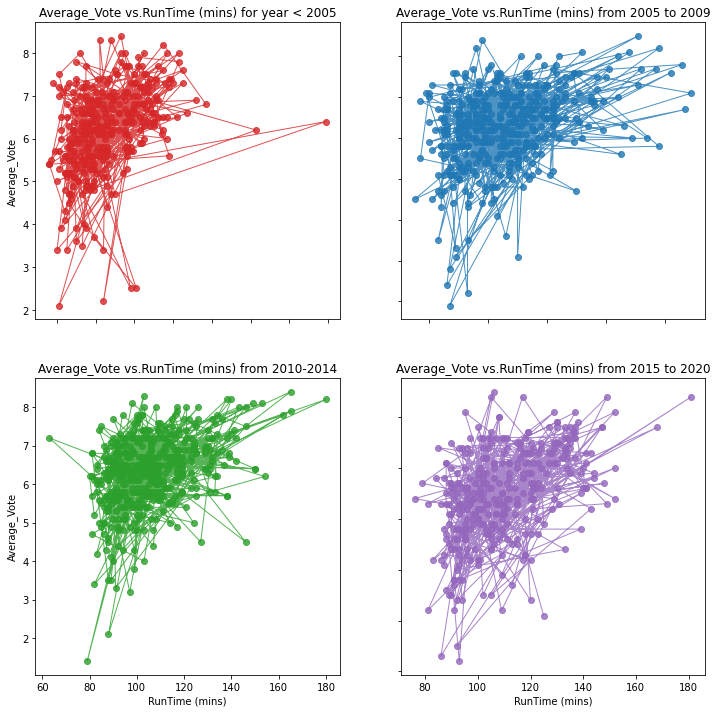

In [13]:
#subploting the above data 
#showing a visualization for Bivariate data( average vote and runtime)
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(12,12)


axs[0, 0].plot(Bin_df["RunTime"], Bin_df["Average_Vote"],"tab:red",alpha=0.8,linewidth=1, marker="o")
axs[0, 0].set_title("Average_Vote vs.RunTime (mins) for year < 2005")
axs[0, 1].plot(Bin1_df["RunTime"], Bin1_df["Average_Vote"],"tab:blue",alpha=0.8,linewidth=1, marker="o")
axs[0, 1].set_title("Average_Vote vs.RunTime (mins) from 2005 to 2009")
axs[1, 0].plot(Bin2_df["RunTime"], Bin2_df["Average_Vote"],"tab:green",alpha=0.8,linewidth=1, marker="o")
axs[1, 0].set_title("Average_Vote vs.RunTime (mins) from 2010-2014")
axs[1, 1].plot(Bin3_df["RunTime"],Bin3_df["Average_Vote"],"tab:purple",alpha=0.8,linewidth=1, marker="o")
axs[1, 1].set_title("Average_Vote vs.RunTime (mins) from 2015 to 2020")

for ax in axs.flat:
    ax.set(xlabel="RunTime (mins)", ylabel="Average_Vote")

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.savefig("Images/avg.vote and runtime yearly intervals.png")    

## question(4 and 5) 
## Does the genre of a movie determine or affects its public rating and runtime? 
### Determine the worldwide gross incomes per genre in the twenty years time frame and analyze them in relation to the average vote, average runtime and fan reviews  

In [14]:

# Creating a dataframe for the average RunTime per genre in 4 times intervals 
#filled the NaN cell with zero
rt_2000_2004 = rename_year_df.loc[rename_year_df["Year"] < 2005].groupby(["Genre"])["RunTime"].mean()
rt_2005_2009 = rename_year_df.loc[(rename_year_df["Year"] >= 2005) & (rename_year_df["Year"]< 2010)].groupby(["Genre"])["RunTime"].mean()
rt_2010_2014 = rename_year_df.loc[(rename_year_df["Year"] >= 2010) & (rename_year_df["Year"]< 2015)].groupby(["Genre"])["RunTime"].mean()
rt_2015_2020 = rename_year_df.loc[rename_year_df["Year"] >= 2015].groupby(["Genre"])["RunTime"].mean()


AVG_RT_df = pd.DataFrame({"2000-2004": rt_2000_2004,
      "2005-2009": rt_2005_2009,
      "2010-2014": rt_2010_2014,
      "2015-2020": rt_2015_2020})
                           
                           
AV_RT_df = AVG_RT_df.fillna(0)

AV_RT_df.to_csv("resources/avg. Runtime yearly intervals.csv")
dfi.export(AV_RT_df,"images/avg. Runtime yearly intervals.png")

AV_RT_df 




,2000-2004,2005-2009,2010-2014,2015-2020
Action,114.414286,111.084337,110.392000,116.702128
Adventure,102.200000,102.250000,106.714286,107.125000
Animation,87.875000,91.947368,94.472222,96.750000
Biography,133.818182,122.315789,118.913043,119.684211
Comedy,99.364286,103.259036,101.093023,103.772727
Crime,111.800000,108.722222,111.458333,121.600000
Drama,110.500000,110.692308,111.395062,111.000000
Family,0.000000,107.000000,0.000000,129.000000
Fantasy,0.000000,94.500000,91.000000,0.000000
Horror,102.600000,96.523810,94.464286,93.384615


In [15]:
#Creating a dataframe for the mean of the Average vote per genre in 4 time intervals
#filled the NaN cell with zero

AV_2000_2004 = rename_year_df.loc[rename_year_df["Average_Vote"] < 2005].groupby(["Genre"])["Average_Vote"].mean()
AV_2005_2009 = rename_year_df.loc[(rename_year_df["Year"] >= 2009) & (rename_year_df["Year"]< 2010)].groupby(["Genre"])["Average_Vote"].mean()
AV_2010_2014 = rename_year_df.loc[(rename_year_df["Year"] >= 2010) & (rename_year_df["Year"]< 2015)].groupby(["Genre"])["Average_Vote"].mean()
AV_2015_2020 = rename_year_df.loc[rename_year_df["Year"] >= 2015].groupby(["Genre"])["Average_Vote"].mean()


Mean_AV_df = pd.DataFrame({"2000-2004": AV_2000_2004,
      "2005-2009": AV_2005_2009,
      "2010-2014": AV_2010_2014,
      "2015-2020": AV_2015_2020})                           
                          
AVG_vote_df = Mean_AV_df.fillna(0)

AVG_vote_df.to_csv("resources/avg.vote yearly intervals.csv")
dfi.export(AVG_vote_df,"images/avg.vote yearly intervals.png")
AVG_vote_df


,2000-2004,2005-2009,2010-2014,2015-2020
Action,6.293548,6.033333,6.268800,6.529787
Adventure,6.001562,6.300000,6.066667,6.212500
Animation,6.688889,6.670000,6.722222,6.828571
Biography,7.038462,6.985714,6.986957,7.013158
Comedy,6.060601,6.110345,6.113953,6.320455
Crime,6.687619,6.800000,6.708333,6.806667
Drama,6.619691,6.707692,6.725926,6.530612
Family,6.500000,0.000000,0.000000,7.100000
Fantasy,6.133333,0.000000,6.500000,0.000000
Horror,5.614118,5.775000,5.628571,5.330769


In [16]:
#retrieving the linear regression and correlation between average vote and average runtime per genre for each period interval

def plot_linear_regression(x_values,y_values,xlbl,ylbl,lblpos):
    
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(slope) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,lblpos ,fontsize=14, color="red")
    plt.xlabel(xlbl,fontsize =12)
    plt.ylabel(ylbl,fontsize =12)
    print(f"The r-squared is: {round(rvalue,3)}")
    
    plt.show()

The r-squared is: -0.133


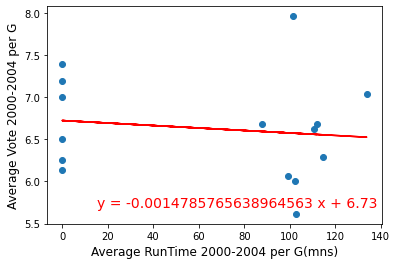

<Figure size 432x288 with 0 Axes>

In [17]:
x_values = AV_RT_df["2000-2004"]
y_values = AVG_vote_df["2000-2004"]
xlbl = "Average RunTime 2000-2004 per G(mns)"
ylbl = "Average Vote 2000-2004 per G"
eqpos = (15,5.7)
plot_linear_regression(x_values,y_values,xlbl,ylbl,eqpos)
plt.savefig("Images/avg.vote and avg.runtime 2000-2004.png") 

The r-squared is: 0.702


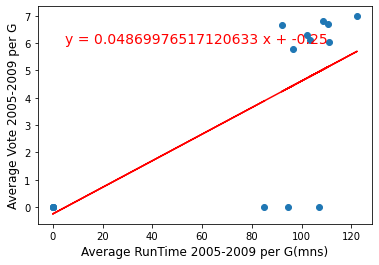

In [18]:
x_values = AV_RT_df["2005-2009"]
y_values = AVG_vote_df["2005-2009"]
xlbl = "Average RunTime 2005-2009 per G(mns)"
ylbl = "Average Vote 2005-2009 per G"
eqpos = (5,6)
plot_linear_regression(x_values,y_values,xlbl,ylbl,eqpos)

The r-squared is: 0.943


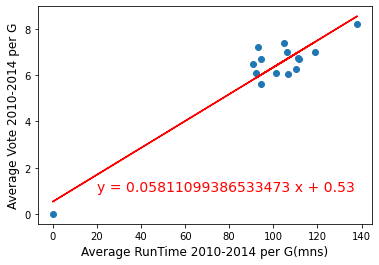

In [19]:
x_values =AV_RT_df["2010-2014"]
y_values =AVG_vote_df["2010-2014"]
xlbl = "Average RunTime 2010-2014 per G(mns)"
ylbl = "Average Vote 2010-2014 per G"
eqpos = (20,1)
plot_linear_regression(x_values,y_values,xlbl,ylbl,eqpos)

The r-squared is: 0.994


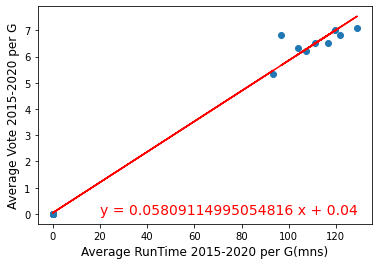

In [20]:
x_values = AV_RT_df["2015-2020"]
y_values = AVG_vote_df["2015-2020"]
xlbl = "Average RunTime 2015-2020 per G(mns)"
ylbl = "Average Vote 2015-2020 per G"
eqpos = (20,0)
plot_linear_regression(x_values,y_values,xlbl,ylbl,eqpos)

In [21]:
#groupying the dataframe by Genere
grouped_movies_df=rename_year_df.groupby(["Genre"])

In [22]:
#The overall Total Gross Income in the considered time frame 
Total_Gross_Income = rename_year_df ["Worldwide Gross Income"].sum()
Total_Gross_Income

229180215335

In [23]:
#determine the Total Worldwide Gross Income per genre from 2000 to 2020 
# to calcolate the percentage of each genre on the overall world wide gross income
sum_wgi = grouped_movies_df["Worldwide Gross Income"].sum()
sum_wgi.map("${:,.0f}".format)

Genre
Action       $91,270,779,105
Adventure     $8,321,348,021
Animation    $49,457,243,863
Biography     $6,945,240,793
Comedy       $41,138,561,095
Crime         $6,214,568,943
Drama        $17,035,824,327
Family        $1,278,931,894
Fantasy         $257,805,064
Horror        $6,440,822,447
Music             $7,975,812
Mystery         $425,034,117
Romance         $127,869,379
Sci-Fi          $161,849,455
Thriller         $96,361,020
Name: Worldwide Gross Income, dtype: object

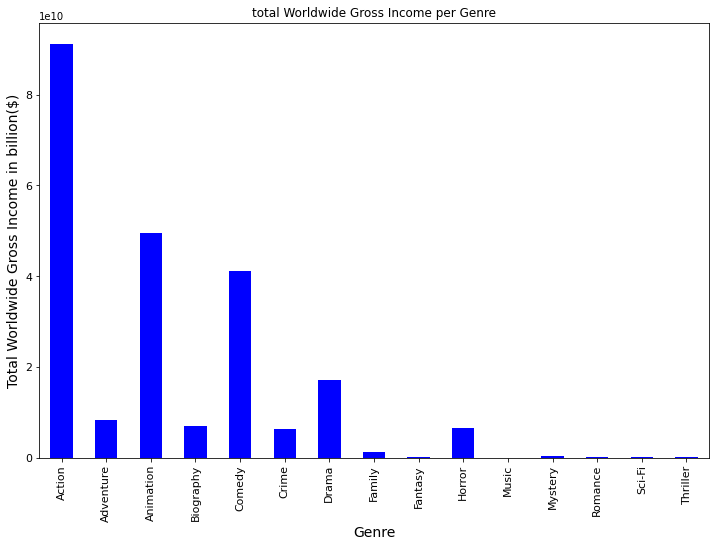

In [24]:
#plotting the Total Worldwide Gross Income per genre from 2000 to 2020
sum_wgi.plot.bar(figsize = (12,8), color = "blue", fontsize = 11)
plt.xlabel("Genre", fontsize = 14)
plt.ylabel("Total Worldwide Gross Income in billion($)",  fontsize = 14)
plt.title("total Worldwide Gross Income per Genre")
plt.savefig("Images/Total Worldwide Gross Income per Genre from 2000 to 2020.png")
plt.show()

In [25]:
#determine the average Worldwide Gross Income per genre from 2000 to 2020 
avg_wgi = grouped_movies_df["Worldwide Gross Income"].mean()
avg_wgi.map("${:,.0f}".format)

Genre
Action       $245,351,557
Adventure    $130,021,063
Animation    $392,517,808
Biography     $76,321,327
Comedy        $72,682,970
Crime         $59,186,371
Drama         $65,775,384
Family       $639,465,947
Fantasy       $85,935,021
Horror        $75,774,382
Music          $7,975,812
Mystery      $141,678,039
Romance      $127,869,379
Sci-Fi       $161,849,455
Thriller      $48,180,510
Name: Worldwide Gross Income, dtype: object

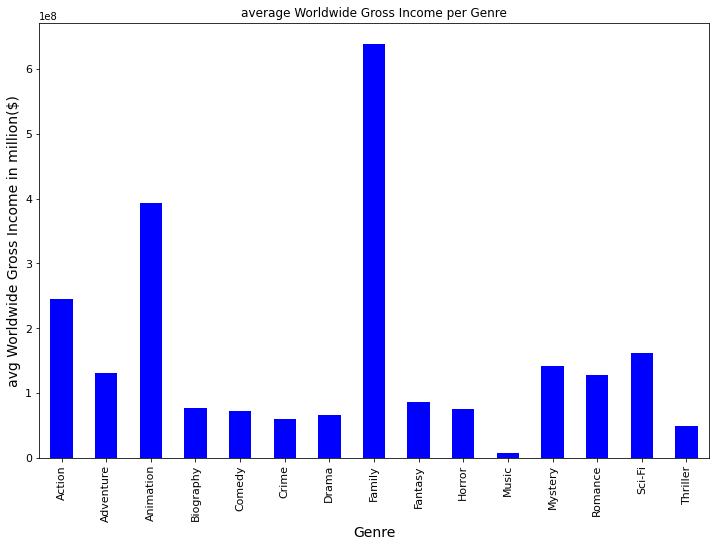

In [26]:
#plot the above result
avg_wgi.plot.bar(figsize = (12,8), color = "blue", fontsize = 11)
plt.xlabel("Genre", fontsize = 14)
plt.ylabel("avg Worldwide Gross Income in million($)",  fontsize = 14)
plt.title("average Worldwide Gross Income per Genre")
plt.savefig("Images/average Worldwide Gross Income per Genre from 2000 to 2020.png")
plt.show()

In [27]:
# percentage of each genere worldwide gross Income in the overall Total gross Income
per_wgp_per_G = (sum_wgi/Total_Gross_Income)*100
per_wgp_per_G.map("{:,.2f}%".format)

Genre
Action       39.82%
Adventure     3.63%
Animation    21.58%
Biography     3.03%
Comedy       17.95%
Crime         2.71%
Drama         7.43%
Family        0.56%
Fantasy       0.11%
Horror        2.81%
Music         0.00%
Mystery       0.19%
Romance       0.06%
Sci-Fi        0.07%
Thriller      0.04%
Name: Worldwide Gross Income, dtype: object

In [28]:
# average runtime per genre
RunTime_D = grouped_movies_df["RunTime"].mean()
RunTime_D.map("{:,.0f}".format)

Genre
Action       113
Adventure    104
Animation     93
Biography    122
Comedy       102
Crime        112
Drama        111
Family       118
Fantasy       93
Horror        96
Music         93
Mystery      114
Romance      106
Sci-Fi       105
Thriller      88
Name: RunTime, dtype: object

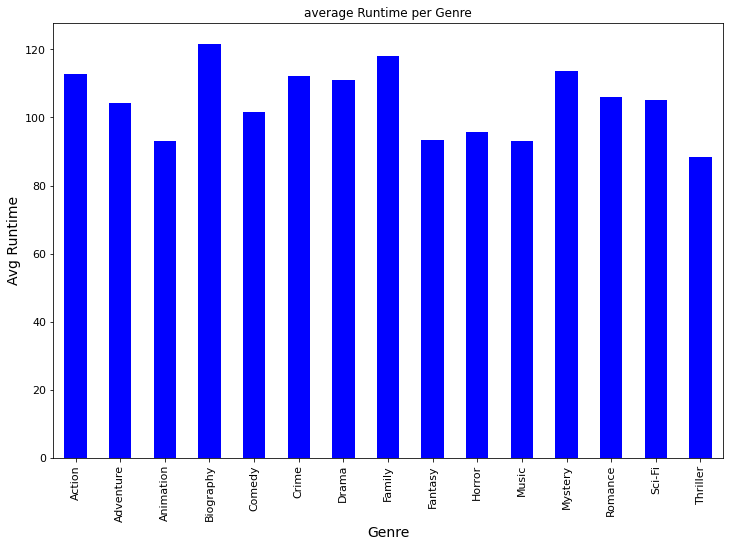

In [29]:
#plot the above result
RunTime_D.plot.bar(figsize = (12,8), color = "blue", fontsize = 11)
plt.xlabel("Genre", fontsize = 14)
plt.ylabel("Avg Runtime",  fontsize = 14)
plt.title("average Runtime per Genre")
plt.savefig("Images/average Runtime per Genre from 2000 to 2020.png")
plt.show()

In [30]:
# average vote per genre in the time frame
avg_D = grouped_movies_df["Average_Vote"].mean()
avg_D.map("{:,.1f}".format)


Genre
Action       6.3
Adventure    6.0
Animation    6.7
Biography    7.0
Comedy       6.1
Crime        6.7
Drama        6.6
Family       6.5
Fantasy      6.1
Horror       5.6
Music        7.2
Mystery      8.0
Romance      7.0
Sci-Fi       7.4
Thriller     6.2
Name: Average_Vote, dtype: object

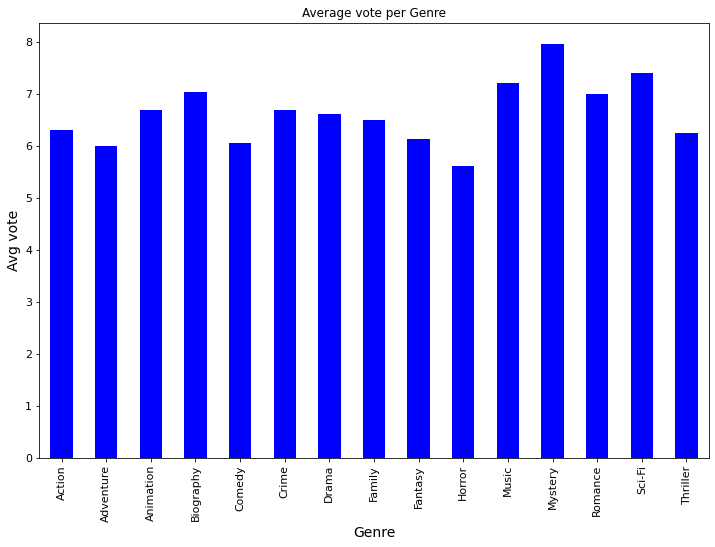

In [31]:
#plot the above result
avg_D.plot.bar(figsize = (12,8), color = "blue", fontsize = 11)
plt.xlabel("Genre", fontsize = 14)
plt.ylabel("Avg vote",  fontsize = 14)
plt.title("Average vote per Genre")
plt.savefig("Images/Average vote per Genre from 2000 to 2020.png")
plt.show()

In [32]:
#Overall amount of fan reviews between 2000 and 2020
Total_W_review = rename_year_df ["Fan Reviews"].sum()
Total_W_review

696364

In [33]:
# determining the total fan reviews per genre in the 20 years time frame
fan_rv = grouped_movies_df["Fan Reviews"].sum()
fan_rv

Genre
Action       259906
Adventure     24868
Animation     44449
Biography     29538
Comedy       135056
Crime         42366
Drama        111329
Family         1345
Fantasy        1832
Horror        39506
Music            69
Mystery        4341
Romance         477
Sci-Fi          488
Thriller        794
Name: Fan Reviews, dtype: int64

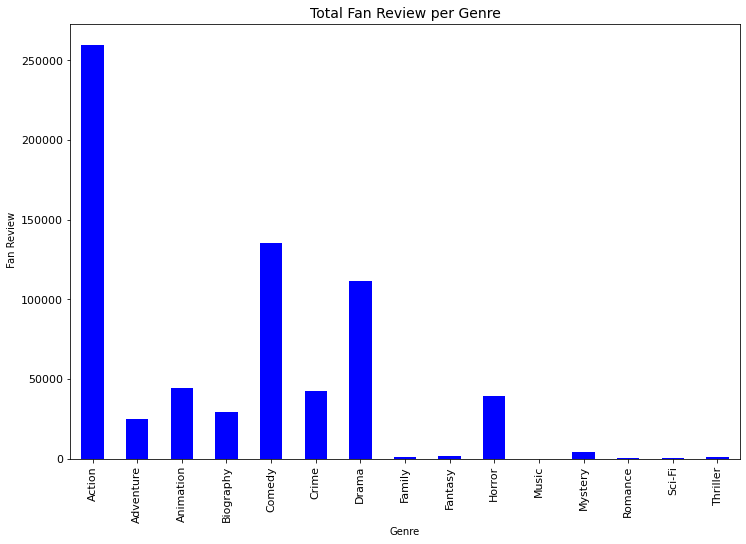

In [34]:
#plot the above result
fan_rv.plot.bar(figsize = (12,8), color = "blue", fontsize = 11)
plt.xlabel("Genre", fontsize = 10)
plt.ylabel(" Fan Review",  fontsize = 10)
plt.title("Total Fan Review per Genre", fontsize = 14)
plt.savefig("Images/Total Fan Review per Genre from 2000 to 2020.png")
plt.show()

In [35]:
# determining the average fan reviews per genre in the 20 years time frame
avgfan_rv = grouped_movies_df["Fan Reviews"].mean()
avgfan_rv#.map("{:,.2f}".format)

Genre
Action        698.672043
Adventure     388.562500
Animation     352.769841
Biography     324.593407
Comedy        238.614841
Crime         403.485714
Drama         429.841699
Family        672.500000
Fantasy       610.666667
Horror        464.776471
Music          69.000000
Mystery      1447.000000
Romance       477.000000
Sci-Fi        488.000000
Thriller      397.000000
Name: Fan Reviews, dtype: float64

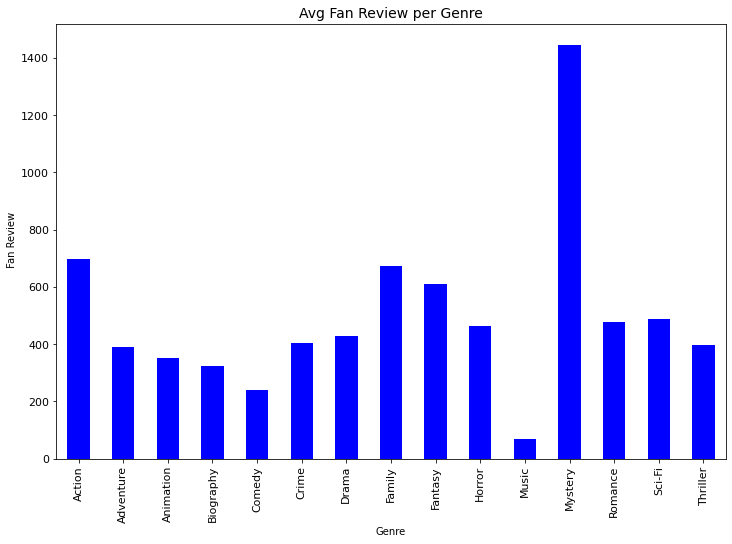

In [36]:
#plot the above result
avgfan_rv.plot.bar(figsize = (12,8), color = "blue", fontsize = 11)
plt.xlabel("Genre", fontsize = 10)
plt.ylabel(" Fan Review",  fontsize = 10)
plt.title("Avg Fan Review per Genre", fontsize = 14)
plt.savefig("Images/Average Fan Review per Genre from 2000 to 2020.png")
plt.show()

In [37]:
# determining the percentage of fan reviews per genre on the overall amount of fan reviews
per_WR_per_G = (fan_rv/Total_W_review)*100
per_WR_per_G.map("{:,.3f}%".format)


Genre
Action       37.323%
Adventure     3.571%
Animation     6.383%
Biography     4.242%
Comedy       19.394%
Crime         6.084%
Drama        15.987%
Family        0.193%
Fantasy       0.263%
Horror        5.673%
Music         0.010%
Mystery       0.623%
Romance       0.068%
Sci-Fi        0.070%
Thriller      0.114%
Name: Fan Reviews, dtype: object

In [38]:
#creating a dataframe of above result for the statistical analysis
prvf_df = pd.DataFrame({"Total wgpg": sum_wgi,
       "Avg Total wgpg":avg_wgi,                  
      "Avg RunTime":RunTime_D,
      "Avg Vote": avg_D,
      "Total Fan reviews": fan_rv,
      "avg Fan reviews": avgfan_rv,                 
      "%Overall Gross Income": per_wgp_per_G,
      "%Overall Fan review":per_WR_per_G})
prvf_df.to_csv("resources/avg. Runtime yearly intervals.csv")
dfi.export(prvf_df,"images/summary prvf.png")

prvf_df

,Total wgpg,Avg Total wgpg,Avg RunTime,Avg Vote,Total Fan reviews,avg Fan reviews,%Overall Gross Income,%Overall Fan review
Genre,,,,,,,,
Action,91270779105,2.453516e+08,112.897849,6.293548,259906,698.672043,39.824895,37.323296
Adventure,8321348021,1.300211e+08,104.312500,6.001562,24868,388.562500,3.630919,3.571121
Animation,49457243863,3.925178e+08,92.960317,6.688889,44449,352.769841,21.580067,6.383012
Biography,6945240793,7.632133e+07,121.747253,7.038462,29538,324.593407,3.030471,4.241747
Comedy,41138561095,7.268297e+07,101.717314,6.060601,135056,238.614841,17.950311,19.394455
Crime,6214568943,5.918637e+07,112.066667,6.687619,42366,403.485714,2.711652,6.083887
Drama,17035824327,6.577538e+07,110.922780,6.619691,111329,429.841699,7.433375,15.987185
Family,1278931894,6.394659e+08,118.000000,6.500000,1345,672.500000,0.558046,0.193146
Fantasy,257805064,8.593502e+07,93.333333,6.133333,1832,610.666667,0.112490,0.263081


In [39]:
#defining the function for the linear regression
#plotting 
def plot_linear_regression(x_values,y_values,xlbl,ylbl,lblpos):
    
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(slope) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,lblpos ,fontsize=14, color="red")
    plt.xlabel(xlbl,fontsize =12)
    plt.ylabel(ylbl,fontsize =12)
    print(f"The r-squared is: {round(rvalue,3)}")
    plt.show()

The r-squared is: 0.354


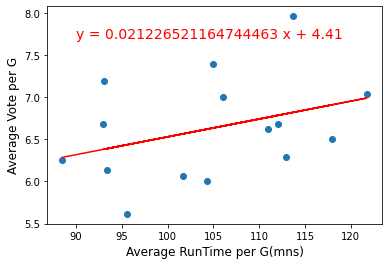

In [40]:
#linear regression line between the Average RunTime and average vote of each genere from 2000 t0 2020
x_values =prvf_df["Avg RunTime"]
y_values =prvf_df["Avg Vote"]
xlbl = "Average RunTime per G(mns)"
ylbl = "Average Vote per G"
eqpos = (90,7.7)
plot_linear_regression(x_values,y_values,xlbl,ylbl,eqpos)

The r-squared is: 0.076


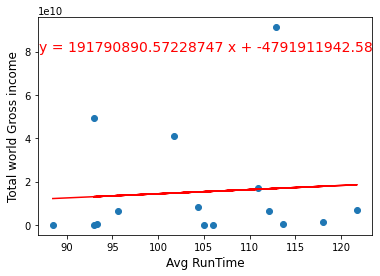

In [41]:
#linear regression line between the total gross income and average runtime of each genere from 2000 t0 2020
x_values = prvf_df["Avg RunTime"]
y_values = prvf_df["Total wgpg"]
xlbl = "Avg RunTime"
ylbl ="Total world Gross income" 
eqpos = (87,80000000000)
plot_linear_regression(x_values,y_values,xlbl,ylbl,eqpos)


The r-squared is: -0.267


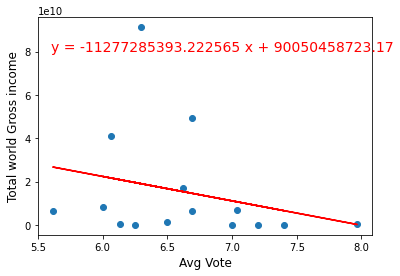

In [42]:
#linear regression line between the total gross income and average vote of each genere from 2000 t0 2020
x_values =prvf_df["Avg Vote"] 
y_values =prvf_df["Total wgpg"] 
xlbl = "Avg Vote"
ylbl ="Total world Gross income" 
eqpos = (5.6,80000000000)
plot_linear_regression(x_values,y_values,xlbl,ylbl,eqpos)


The r-squared is: 0.903


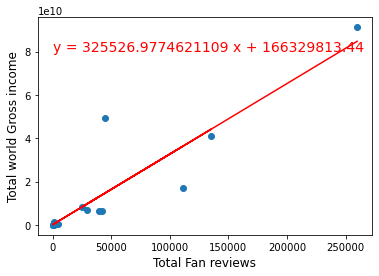

In [43]:
#linear regression line between the total gross income and fan reviews of each genere from 2000 t0 2020
x_values = prvf_df["Total Fan reviews"]
y_values =prvf_df["Total wgpg"] 
xlbl = "Total Fan reviews"
ylbl ="Total world Gross income" 
eqpos = (0,80000000000)
plot_linear_regression(x_values,y_values,xlbl,ylbl,eqpos)

# Hypothesis test

In [44]:
# performing a t_test
stats.ttest_ind(prvf_df["Total wgpg"], prvf_df["Total Fan reviews"], equal_var=False)

Ttest_indResult(statistic=2.276770413284427, pvalue=0.03903000759076902)

# Q6) are there directors who are more favorites,  how good are the films they have directed so far and their career in general?

In [118]:
%matplotlib notebook

In [122]:
rename_df = pd.read_csv('resources/rename_year_df.csv')
rename_df['Date']= pd.to_datetime(rename_df.Date)
rename_df.head()

,Unnamed: 0,Movie ID,Title,Date,Genre,RunTime,country,Director,Actors,Average_Vote,Budget,USA Gross Income,Worldwide Gross Income,Fan Reviews,Year
0,883,4364194,The Peanut Butter Falcon,2020-06-15,Comedy,97,USA,"Tyler Nilson, Michael Schwartz",Zack Gottsagen,7.6,6200000,20457151,23620709,423,2020
1,309,1634106,Bloodshot,2020-03-27,Action,109,USA,Dave Wilson,Vin Diesel,5.7,45000000,10021787,30855391,672,2020
2,44,7713068,Birds of Prey: And the Fantabulous Emancipatio...,2020-06-02,Action,109,USA,Cathy Yan,Margot Robbie,6.1,84500000,84158461,201858461,2222,2020
3,1519,3281548,Little Women,2020-09-01,Drama,135,USA,Greta Gerwig,Saoirse Ronan,7.8,40000000,108101214,216601214,897,2020
4,1305,5727208,Uncut Gems,2020-01-31,Crime,135,USA,"Benny Safdie, Josh Safdie",Mesfin Lamengo,7.4,19000000,50023780,50023780,2193,2020


In [133]:
# to get the year column
rename_df.Date.dt.year

0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
1676    2000
1677    2000
1678    2000
1679    2000
1680    2000
Name: Date, Length: 1681, dtype: int64

In [135]:
# Year column inserted into dataframe
rename_df['Year'] = rename_df.Date.dt.year

In [136]:
director_sum = rename_df['Director'].unique()
len(director_sum)

955

In [137]:
# To get the directors with more than 7 movies
director_list = rename_df.Director.value_counts().loc[lambda x: x>7].index
director_list

Index(['Clint Eastwood', 'Steven Soderbergh', 'David Gordon Green'], dtype='object')

In [125]:
# Calculate the percentage contributed by each of the top three directors to the total worldwide gross income

total_sum = rename_df['Worldwide Gross Income'].sum()

# sum of gross income for the three directors
sum_clint = rename_df.loc[rename_df['Director']=='Clint Eastwood'].sum()['Worldwide Gross Income']
sum_steven =rename_df.loc[rename_df['Director']=='Steven Soderbergh'].sum()['Worldwide Gross Income']
sum_david =rename_df.loc[rename_df['Director']=='David Gordon Green'].sum()['Worldwide Gross Income']


# percentage of each of the three directors to the total overall gross income
percentage_clint = round((sum_clint/total_sum)*100,2)
percentage_steven = round((sum_steven/total_sum)*100,2)
percentage_david = round((sum_david/total_sum)*100,2)
percentage_all_three = (percentage_clint+percentage_steven+percentage_david )
percentage_rest = (100-(percentage_all_three))

# print 
print(f'{director_list[0]} generated {percentage_clint}% of the  total Worldwide Gross Income')
print(f'{director_list[1]} generated {percentage_steven}% of the  total Worldwide Gross Income')
print(f'{director_list[2]} generated  {percentage_david}% of the  total Worldwide Gross Income')
print(f'{director_list[0]}, {director_list[1]} and {director_list[2]} generated  a total of {percentage_all_three}% of the  total Worldwide Gross Income between 2000 and 2020')

Clint Eastwood generated 0.8% of the  total Worldwide Gross Income
Steven Soderbergh generated 0.74% of the  total Worldwide Gross Income
David Gordon Green generated  0.08% of the  total Worldwide Gross Income
Clint Eastwood, Steven Soderbergh and David Gordon Green generated  a total of 1.62% of the  total Worldwide Gross Income between 2000 and 2020


<IPython.core.display.Javascript object>


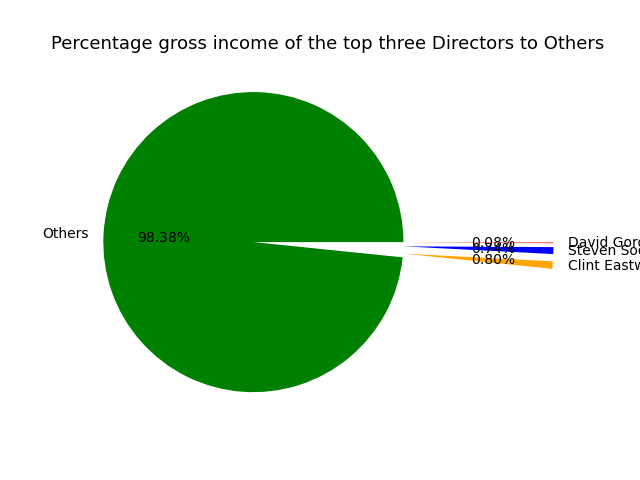

([<matplotlib.patches.Wedge at 0x26532b15648>,
 [Text(-1.0985757079758325, 0.05595903720936356, 'Others'),
  Text(2.0938332485815065, -0.16081768290401272, 'Clint Eastwood'),
  Text(2.0991606439665276, -0.059368264435087775, 'Steven Soderbergh'),
  Text(2.099993367442431, -0.005277944467246307, 'David Gordon Green')],
 [Text(-0.599223113441363, 0.030523111205107388, '98.38%'),
  Text(1.5953015227287668, -0.1225277584030573, '0.80%'),
  Text(1.5993604906411636, -0.04523296337911449, '0.74%'),
  Text(1.5999949466228045, -0.004021291022663853, '0.08%')])

In [126]:
# create a pie chart to visualize the percentage of the top three directors to the rest
labels =['Others','Clint Eastwood', 'Steven Soderbergh','David Gordon Green']

sizes = (percentage_rest,percentage_clint, percentage_steven, percentage_david)

colors = ['green', 'orange', 'blue', 'red']

explode=(0,1,1,1)

plt.title("Percentage gross income of the top three Directors to Others",fontsize=13)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.2f%%")

In [127]:
plt.axis('equal')

(-1.1555404029722516,
 2.150260519954086,
 -1.107434571631847,
 1.1034582028964346)

In [129]:
# Create a dataframe for all three directors wit more than 7 movies

clint_list = rename_df.loc[rename_df['Director']=='Clint Eastwood']
Steven_list = rename_df.loc[rename_df['Director']=='Steven Soderbergh']
David_list = rename_df.loc[rename_df['Director']=='David Gordon Green']


# merge all three dataframe
directors_df =clint_list.merge(Steven_list,how='outer').merge(David_list,how='outer')

In [130]:
directors_df['Director'].value_counts()

Clint Eastwood        13
Steven Soderbergh     11
David Gordon Green     8
Name: Director, dtype: int64

In [140]:
#using groupby to get the  worldwide gross income for all three directors

grouped_df = directors_df.groupby(['Director'])
average_df = grouped_df.sum()['Worldwide Gross Income']
gross=pd.DataFrame(average_df)
gross_df =gross.sort_index()

In [141]:
#using groupby to get the total budget for all three directors
group_budget = directors_df.groupby(['Director'])
average_budget = grouped_df.sum()['Budget']
budget = pd.DataFrame(average_budget)
budget_df = budget.sort_index()

In [142]:
# Create a dataframe showing the budget 
combined_df= pd.merge(budget_df, gross_df, how = 'outer', left_index=True, right_index=True)
combined_df

,Budget,Worldwide Gross Income
Director,,
Clint Eastwood,668800000,1827737479
David Gordon Green,167125000,185065822
Steven Soderbergh,473200000,1705242219


In [143]:
# To calculate Profit
profit = combined_df['Worldwide Gross Income']-combined_df['Budget']
profit_df = pd.DataFrame(profit)

newest_dataframe = pd.merge(combined_df, profit_df, how ='outer', left_index=True, right_index=True)

#newest_dataframe['Worldwide Gross Income']

#renamed_df= newest_dataframe.rename (columns = {"Budget":"Budget", "Worldwide Gross Income":"Worldwide Gross Income","0" : "Profit"}) 
newest_dataframe.columns=['Budget', 'Worldwide Gross Income', 'Profit']
newest_dataframe

,Budget,Worldwide Gross Income,Profit
Director,,,
Clint Eastwood,668800000,1827737479,1158937479
David Gordon Green,167125000,185065822,17940822
Steven Soderbergh,473200000,1705242219,1232042219


In [144]:
# To calculate percentage profit
percentage_profit = round((profit/combined_df['Budget'])*100,2)
percentage_profit_df = pd.DataFrame(percentage_profit)

# merge add percentage profit to renamed_df Dataframe
relationship_dataframe = pd.merge(newest_dataframe,percentage_profit_df, how ='outer', left_index=True, right_index=True)
relationship_dataframe.columns=['Budget', 'Worldwide Gross Income', 'Profit', 'Profit %']
relationship_dataframe

,Budget,Worldwide Gross Income,Profit,Profit %
Director,,,,
Clint Eastwood,668800000,1827737479,1158937479,173.29
David Gordon Green,167125000,185065822,17940822,10.73
Steven Soderbergh,473200000,1705242219,1232042219,260.36


In [158]:
# Generate a Pie-chart, showing the percentage profit when compared all three directors


#Create variables to use in pie chart 
explode = (0,0,0.1)
colors =["turquoise", "deeppink","green"]
labels = list(combined_df.index)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(relationship_dataframe['Profit %'], explode=explode, labels=labels, colors = colors,
        autopct="%1.2f%%", shadow=True, startangle=70)


 #Create axes which are equal so we have a perfect circle
plt.title("Profit Percentage when Compare all Three Director",fontsize=13)
plt.legend(labels, frameon=True, bbox_to_anchor=(1, 1))
plt.axis("equal")



(-102.06419722488856, 2121.050676058328, -27371319.715497524, 574797690.653119)

In [148]:
# using list comprehension to extract the average vote, gross income and year columns for the directors
# with more than 7 movies 

df_average_Vote=[]
gross_income=[]
years=[]

for director in director_list:
    
    movie_loc = rename_df.loc[rename_df['Director']==director]
    vote_list = movie_loc['Average_Vote']
    income_list = movie_loc['Worldwide Gross Income']
    year_list = movie_loc['Year']
    
    df_average_Vote.append(vote_list)
    
    gross_income.append(income_list)
    
    years.append(year_list)

<IPython.core.display.Javascript object>


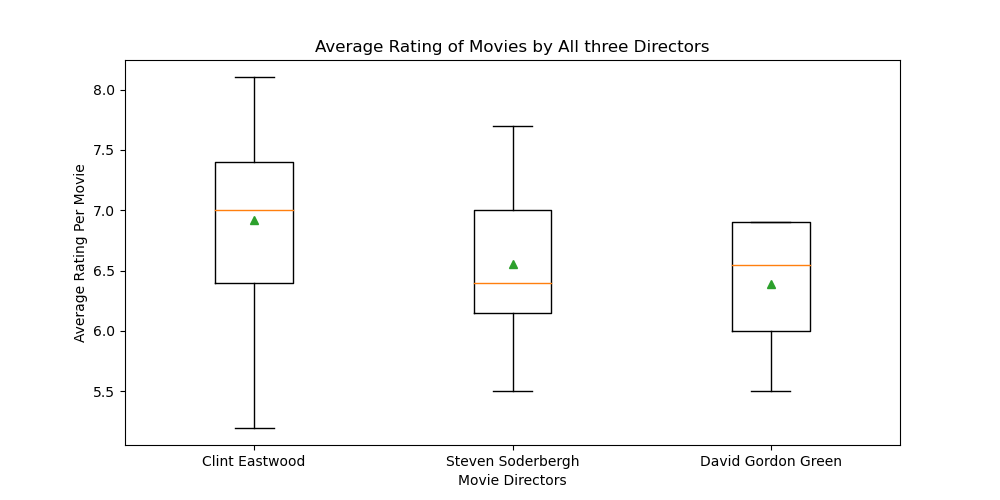

C:\Users\javim\anaconda3\envs\PythonData\lib\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


In [150]:
# Boxplot showing the average rating of movies directed by the 3 most popular movie directors between 2000 and 2020

fig, ax = plt.subplots(figsize=(10, 5))
ax.boxplot(df_average_Vote, labels= director_list,  showmeans=True)
ax.set_title('Average Rating of Movies by All three Directors')
ax.set_ylabel('Average Rating Per Movie')
ax.set_xlabel('Movie Directors')


plt.show()

In [153]:
df_year = rename_df['Year']

<IPython.core.display.Javascript object>


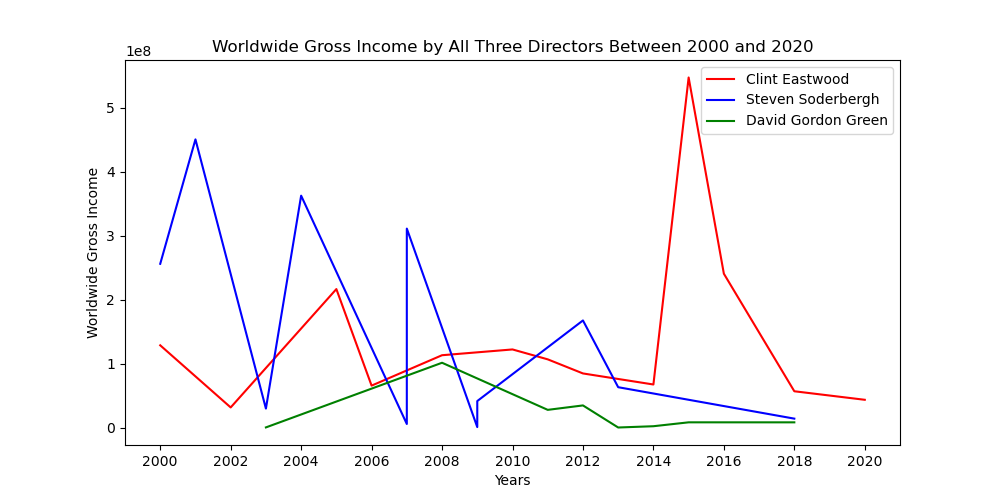

In [159]:
 #Line chart showing the 

fig1, ax1 = plt.subplots(figsize=(10, 5))

plt.plot(years[0],gross_income[0], color='red', label=director_list[0])
plt.plot(years[1],gross_income[1], color='blue', label=director_list[1])
plt.plot(years[2],gross_income[2], color='green', label=director_list[2])

plt.legend(loc='best')

plt.title('Worldwide Gross Income by All Three Directors Between 2000 and 2020')
plt.xlabel('Years')
plt.xticks(np.arange(min(df_year ),max(df_year )+1,2))
plt.ylabel('Worldwide Gross Income')

plt.show()

In [155]:
# Showing how the three directors are distributed between 2000 and 2020.
director_year =directors_df[['Year','Director','Genre']]
director_year
groupby_df=director_year.groupby(['Year','Director'])
groupby_df.first()

Genre
Year Director                     
2000 Clint Eastwood         Action
     Steven Soderbergh   Biography
2001 Steven Soderbergh       Crime
2002 Clint Eastwood         Action
2003 David Gordon Green      Drama
     Steven Soderbergh       Drama
2004 Steven Soderbergh       Crime
2005 Clint Eastwood          Drama
2006 Clint Eastwood         Action
2007 Steven Soderbergh      Action
2008 Clint Eastwood      Biography
     David Gordon Green     Action
2009 Steven Soderbergh   Biography
2010 Clint Eastwood      Biography
2011 Clint Eastwood          Drama
     David Gordon Green  Adventure
2012 Clint Eastwood      Biography
     David Gordon Green     Comedy
     Steven Soderbergh      Comedy
2013 David Gordon Green     Comedy
     Steven Soderbergh       Crime
2014 Clint Eastwood      Biography
     David Gordon Green      Crime
2015 Clint Eastwood         Action
     David Gordon Green     Comedy
2016 Clint Eastwood      Biography
2018 Clint Eastwood      Biography
     David Gordon Green  Biography
     Steven Soderbergh       Drama
2020 Clint Eastwood      Biography

# 7) Does the movie release time affects the profitability?

1. Analysing the release time of the Biggest blockbluster(Movies of the year) movies 

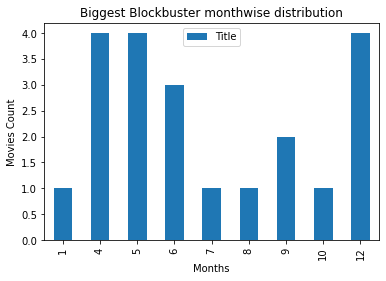

In [68]:
# Biggest Blockbluster release time - (Month distribution)

blockbuster_summ["Date"] = pd.to_datetime(blockbuster_summ["Date"])
blockbuster_summ["Quarter"] = blockbuster_summ["Date"].dt.quarter
blockbuster_summ["Month"] = blockbuster_summ["Date"].dt.month
x = blockbuster_summ[["Title","Month"]].groupby("Month").count()
x.plot.bar()
plt.xlabel("Months")
plt.ylabel("Movies Count")
plt.title("Biggest Blockbuster monthwise distribution")
plt.show()

# blockbuster_summ.dtypes

2. Analysing the release time of the Blockbuster movies 

C:\Users\javim\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\javim\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


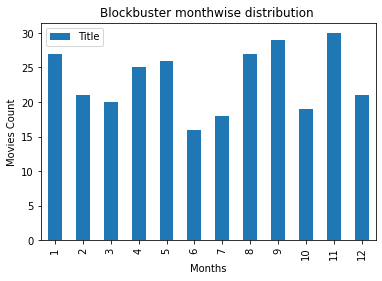

In [70]:
# Blockbusters release time -(month distribution)

blockblusters["Date"] = pd.to_datetime(blockblusters["Date"])
blockblusters["Month"] = blockblusters["Date"].dt.month
y = blockblusters[["Title","Month"]].groupby("Month").count()
y.plot.bar()
plt.xlabel("Months")
plt.ylabel("Movies Count")
plt.title("Blockbuster monthwise distribution ")

plt.show()

3. Analysing the release time of the Flop movies 

C:\Users\javim\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\javim\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\javim\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

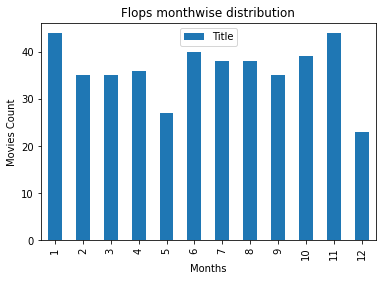

In [71]:
flops["Date"] = pd.to_datetime(flops["Date"])
flops["Quarter"] = flops["Date"].dt.quarter
flops["Month"] = flops["Date"].dt.month
z = flops[["Title","Month"]].groupby("Month").count()
z.plot.bar()
plt.xlabel("Months")
plt.ylabel("Movies Count")
plt.title("Flops monthwise distribution")
plt.show()

4. Analysing Biggest blockbuster, blockbuster and flop movies monthwise count through line graph

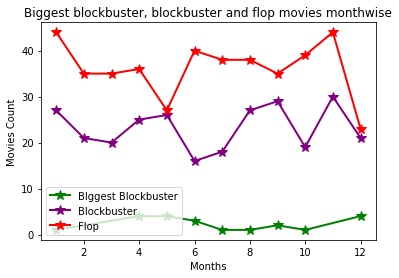

In [72]:
plt.plot(x,linewidth=2, markersize=10,marker="*",color="green", label="BIggest Blockbuster")
plt.plot(y,linewidth=2, markersize=10,marker="*",color="purple", label="Blockbuster")
plt.plot(z,linewidth=2, markersize=10,marker="*",color="red", label="Flop")

plt.title("Biggest blockbuster, blockbuster and flop movies monthwise")
plt.xlabel("Months")
plt.ylabel("Movies Count")

plt.legend(loc="best")

plt.show()